# Analysing NYC Citi Bike dataset

## Overview

This notebook aims to explore and analyze the NYC Citi Bike dataset to uncover patterns and trends that tell us more about the city's rhythms, its neighborhoods, and the people who use this service every day.

## Imports, Functions and Data Loading

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Functions Used

In [2]:
def add_bar_count(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')

In [3]:
def haversine_distance(long1,lat1,long2,lat2):
    long1,lat1,long2,lat2 = map(np.radians, [long1,lat1,long2,lat2])

    delta_lat = lat2-lat1
    delta_long = long2-long1
    
    a=np.sin(delta_lat/2)**2 +(np.cos(lat1)*np.cos(lat2)*np.sin(delta_long/2)**2)
    c= 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    r = 6371
    
    distance = r*c
    
    return distance

### Data Loading

In [4]:
df_1 = pd.read_csv("201908-citibike-tripdata_1.csv")
df_2 = pd.read_csv("201908-citibike-tripdata_2.csv")
df_3 = pd.read_csv("201908-citibike-tripdata_3.csv")

In [5]:
# Concating all tables to have the full august 2023 data in one data frame
df = pd.concat([df_1, df_2, df_3])
df.reset_index(drop=True, inplace=True)

# Showing a sample of the data
df.head()

tripduration                 starttime                  stoptime   
0           393  2019-08-01 00:00:01.4680  2019-08-01 00:06:35.3780  \
1           627  2019-08-01 00:00:01.9290  2019-08-01 00:10:29.7840   
2          1132  2019-08-01 00:00:04.0480  2019-08-01 00:18:56.1650   
3          1780  2019-08-01 00:00:04.1630  2019-08-01 00:29:44.7940   
4          1517  2019-08-01 00:00:05.4580  2019-08-01 00:25:23.4550   

   start station id              start station name  start station latitude   
0             531.0          Forsyth St & Broome St               40.718939  \
1             274.0  Lafayette Ave & Fort Greene Pl               40.686919   
2            2000.0        Front St & Washington St               40.702551   
3             479.0                 9 Ave & W 45 St               40.760193   
4            3312.0                 1 Ave & E 94 St               40.781721   

   start station longitude  end station id            end station name   
0               -73.992663           408.0       Market St & Cherry St  \
1               -73.976682          3409.0        Bergen St & Smith St   
2               -73.989402          3388.0     President St & Henry St   
3               -73.991255           473.0  Rivington St & Chrystie St   
4               -73.945940          3312.0             1 Ave & E 94 St   

   end station latitude  end station longitude  bikeid    usertype   
0             40.710762             -73.994004   35305  Subscriber  \
1             40.686744             -73.990632   38822  Subscriber   
2             40.682800             -73.999904   18373  Subscriber   
3             40.721101             -73.991925   25002  Subscriber   
4             40.781721             -73.945940   31198  Subscriber   

   birth year  gender  
0        1996       2  
1        1998       2  
2        1988       1  
3        1988       1  
4        1965       2

## Data Exploration

In [6]:
df.shape

(2344224, 15)

Our data consists of ***2,344,224 rows*** and ***15 columns***.

In [7]:
# We have some columns with missing values
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344224 entries, 0 to 2344223
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tripduration             2344224 non-null  int64  
 1   starttime                2344224 non-null  object 
 2   stoptime                 2344224 non-null  object 
 3   start station id         2344135 non-null  float64
 4   start station name       2344135 non-null  object 
 5   start station latitude   2344224 non-null  float64
 6   start station longitude  2344224 non-null  float64
 7   end station id           2344135 non-null  float64
 8   end station name         2344135 non-null  object 
 9   end station latitude     2344224 non-null  float64
 10  end station longitude    2344224 non-null  float64
 11  bikeid                   2344224 non-null  int64  
 12  usertype                 2344224 non-null  object 
 13  birth year               2344224 non-null 

In [8]:
# Percentage of nulls in each column
df.isnull().mean() * 100

tripduration               0.000000
starttime                  0.000000
stoptime                   0.000000
start station id           0.003797
start station name         0.003797
start station latitude     0.000000
start station longitude    0.000000
end station id             0.003797
end station name           0.003797
end station latitude       0.000000
end station longitude      0.000000
bikeid                     0.000000
usertype                   0.000000
birth year                 0.000000
gender                     0.000000
dtype: float64

## Data Cleaning and Preprocessing

In [6]:
# Removing entries with missing station id / name.
df.dropna(axis=0, inplace=True)

In [7]:
# Getting current year using datetime to be automated to get the age at any year in the future
current_year = str(datetime.datetime.today()).split('-')[0]

# Making a new column for age
df['age'] = pd.to_numeric(current_year) - pd.to_numeric(df['birth year'], errors='coerce')

# Converting time into datetime data type
df['starttime'] = pd.to_datetime(df['starttime'], errors='coerce')
df['stoptime'] = pd.to_datetime(df['stoptime'], errors='coerce')

## Exploratory Data Analysis (EDA)

### User Demographics

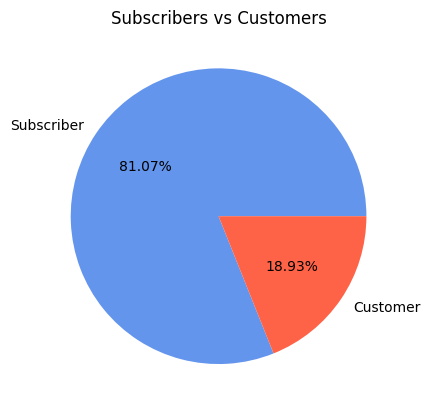

In [275]:
#number of subscribers(Annual Member) vs customers(24-hour pass or 3-day pass user)
user_type_count = df['usertype'].value_counts()
plt.pie(user_type_count.values, labels=user_type_count.index ,autopct='%1.2f%%',
        colors=['cornflowerblue','tomato'])
plt.title('Subscribers vs Customers', fontsize=12)
plt.show()

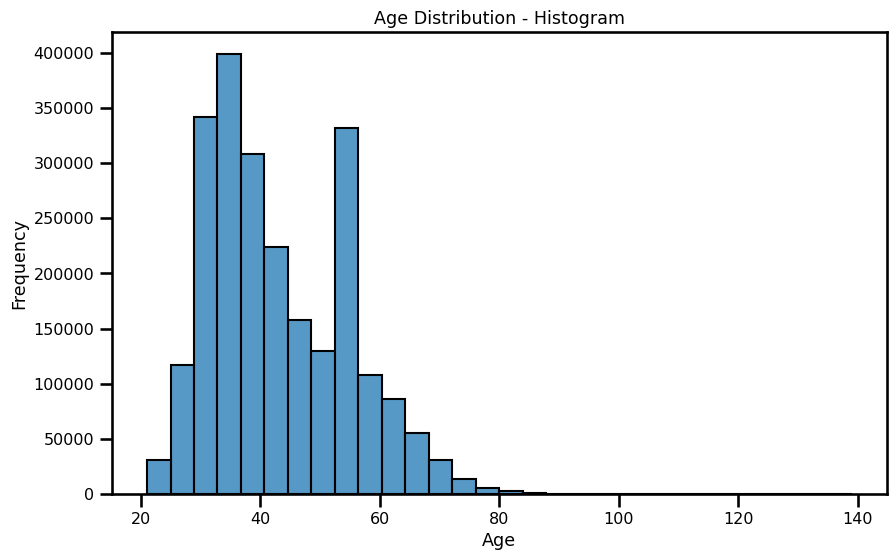

C:\Users\Youssef amr\AppData\Local\Temp\ipykernel_26224\1188149932.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_column, shade=True)


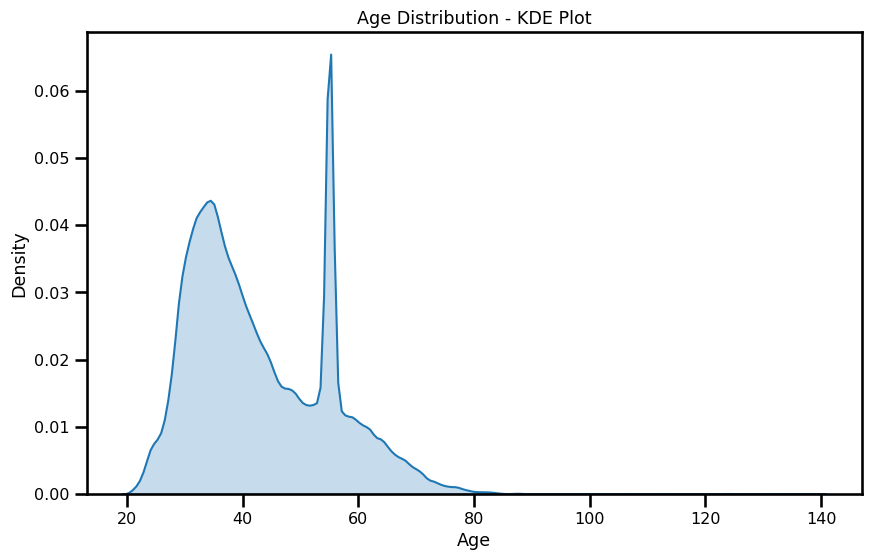

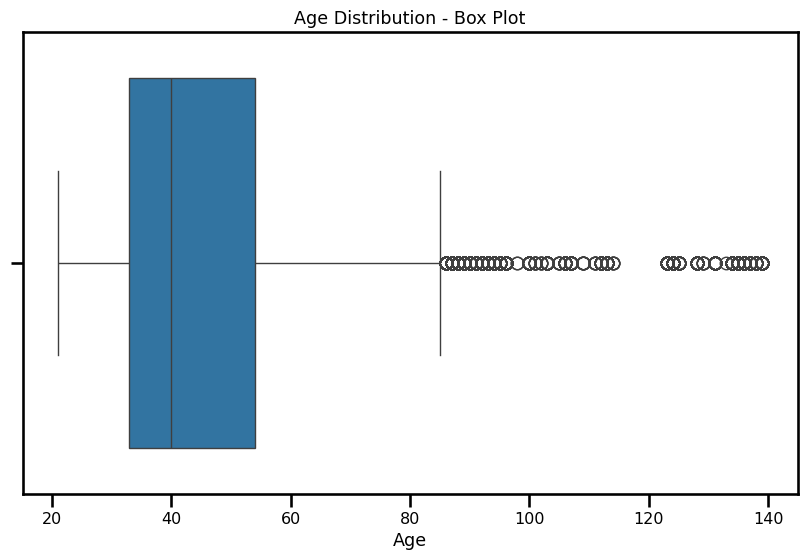

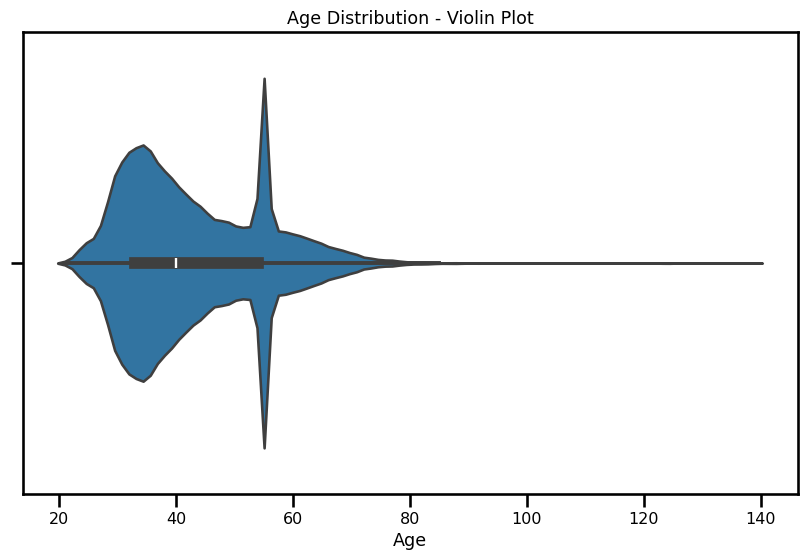

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your DataFrame and 'age' is the continuous column
age_column = df['age']

# 1. Histogram
plt.figure(figsize=(10, 6))
sns.histplot(age_column, bins=30, kde=False)
plt.title('Age Distribution - Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(age_column, shade=True)
plt.title('Age Distribution - KDE Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# 3. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=age_column)
plt.title('Age Distribution - Box Plot')
plt.xlabel('Age')
plt.show()

# 4. Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=age_column)
plt.title('Age Distribution - Violin Plot')
plt.xlabel('Age')
plt.show()


In [34]:
df_customers = df[df['usertype']=='Customer']

In [35]:
customer_count_by_age = df_customers.groupby(['age']).size().sort_values(ascending=False)

In [36]:
# Get the total number of customers
total_customers = len(df_customers)

# Calculate the percentage of customers for each age group
percentage_by_age = (customer_count_by_age / total_customers) * 100

# Sort the Series by percentage in descending order
percentage_by_age_sorted = percentage_by_age.sort_values(ascending=False)

# Print the results
print(percentage_by_age_sorted)

age
55     42.892870
35      3.548383
29      3.515262
30      3.211997
31      3.182707
         ...    
131     0.000451
105     0.000225
111     0.000225
133     0.000225
135     0.000225
Length: 80, dtype: float64


In [41]:
df_customers_55 = df_customers[df_customers['age']==55]

df_customers_55_gender = df_customers_55.replace({1:'Male',2:'Female', 0:'Unknown' }).groupby(['gender']).size()

df_customers_55_gender

gender
Female        814
Male         1425
Unknown    188135
dtype: int64

In [40]:
# Get the total number of customers
total_customers = len(df_customers_55)

# Calculate the percentage of customers for each age group
percentage_by_age = (df_customers_55_gender / total_customers) * 100
percentage_by_age

gender
Female      0.427579
Male        0.748527
Unknown    98.823894
dtype: float64

C:\Users\Youssef amr\AppData\Local\Temp\ipykernel_26224\2913423167.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['usertype'] == 'Subscriber'], x='age', shade=True, label='Subscriber', color='steelblue')
C:\Users\Youssef amr\AppData\Local\Temp\ipykernel_26224\2913423167.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['usertype'] == 'Customer'], x='age', shade=True, label='Customer', color='darkorange')


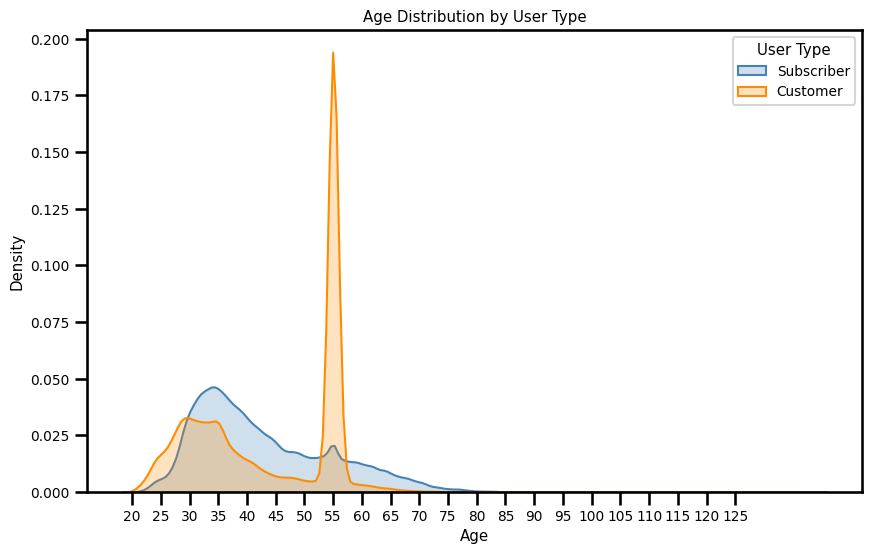

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the context and figure size
sns.set_context("talk", font_scale=0.6)
plt.figure(figsize=(10, 6))



# Plot KDE for Subscriber underneath
sns.kdeplot(data=df[df['usertype'] == 'Subscriber'], x='age', shade=True, label='Subscriber', color='steelblue')

# Plot KDE for Customer first, so it appears on top
sns.kdeplot(data=df[df['usertype'] == 'Customer'], x='age', shade=True, label='Customer', color='darkorange')

# Customize the plot appearance
plt.title('Age Distribution by User Type')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xticks(np.arange(20, 130, 5))

# Add the custom legend to explain the colors
plt.legend(title='User Type', loc='upper right')

# Display the plot
plt.show()


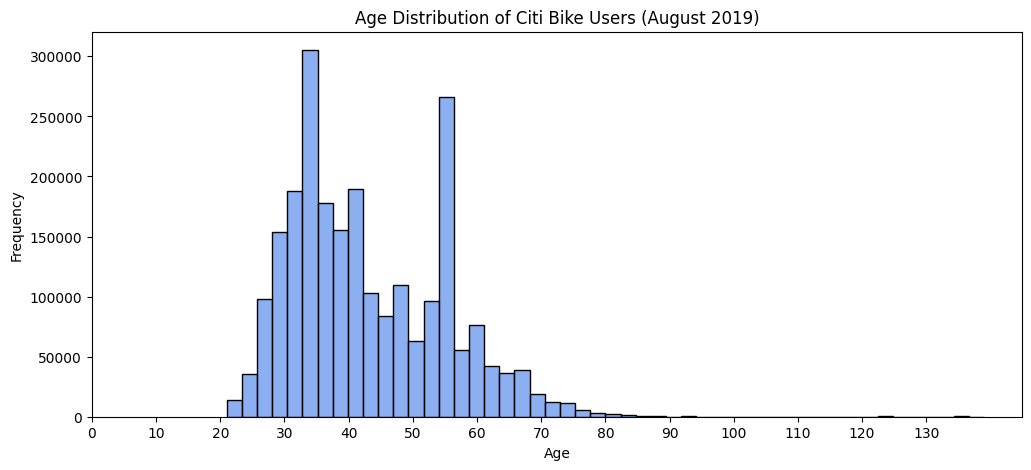

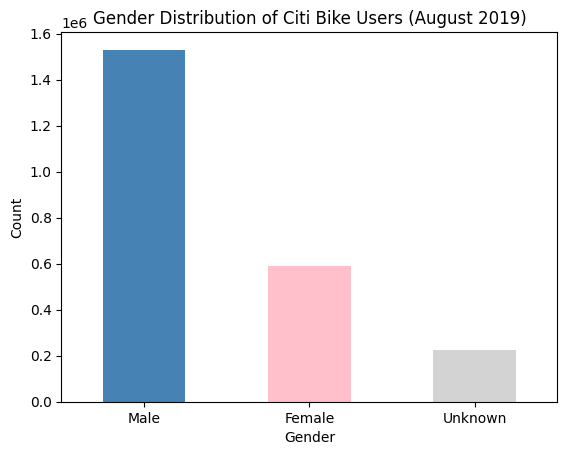

In [337]:
#plotting age distrubtion
plt.figure(figsize=(12, 5))
sns.histplot(df['age'],bins=50,color="cornflowerblue")
plt.title('Age Distribution of Citi Bike Users (August 2019)')
plt.xticks(ticks=range(0, df['age'].max() + 1, 10))  # Adjust the step size as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#plotting gender distribution
gender_distribution= df['gender'].replace({1:'Male',2:'Female', 0:'Unknown' }).value_counts()
gender_distribution.plot(kind='bar', color=['steelblue','pink','lightgrey'])
plt.title('Gender Distribution of Citi Bike Users (August 2019)')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Start and End Stations Analysis

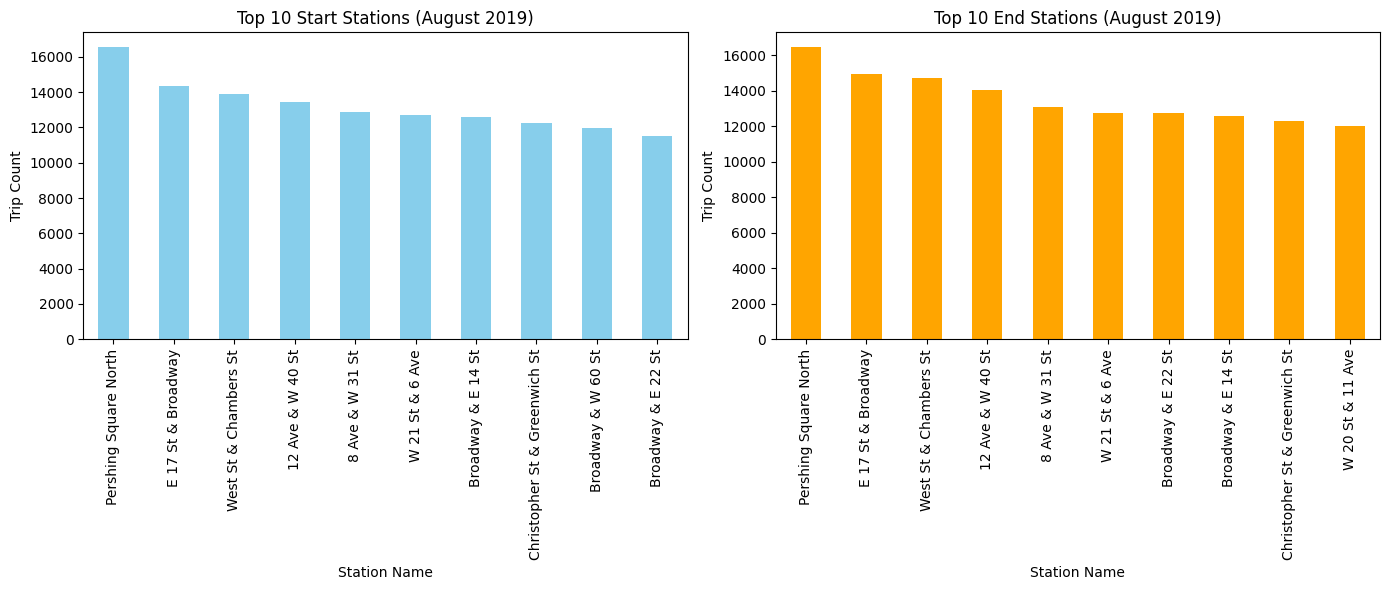

In [263]:
#top 10 start and end stations
top_start_stations = df['start station name'].value_counts().head(10)
top_end_stations = df['end station name'].value_counts().head(10)

plt.figure(figsize=(14, 6))
#ploting the top 10 start stations
plt.subplot(1, 2, 1)
top_start_stations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Start Stations (August 2019)')
plt.xlabel('Station Name')
plt.ylabel('Trip Count')

#ploting the top 10 end stations
plt.subplot(1, 2, 2)
top_end_stations.plot(kind='bar', color='orange')
plt.title('Top 10 End Stations (August 2019)')
plt.xlabel('Station Name')
plt.ylabel('Trip Count')

plt.tight_layout()
plt.show()

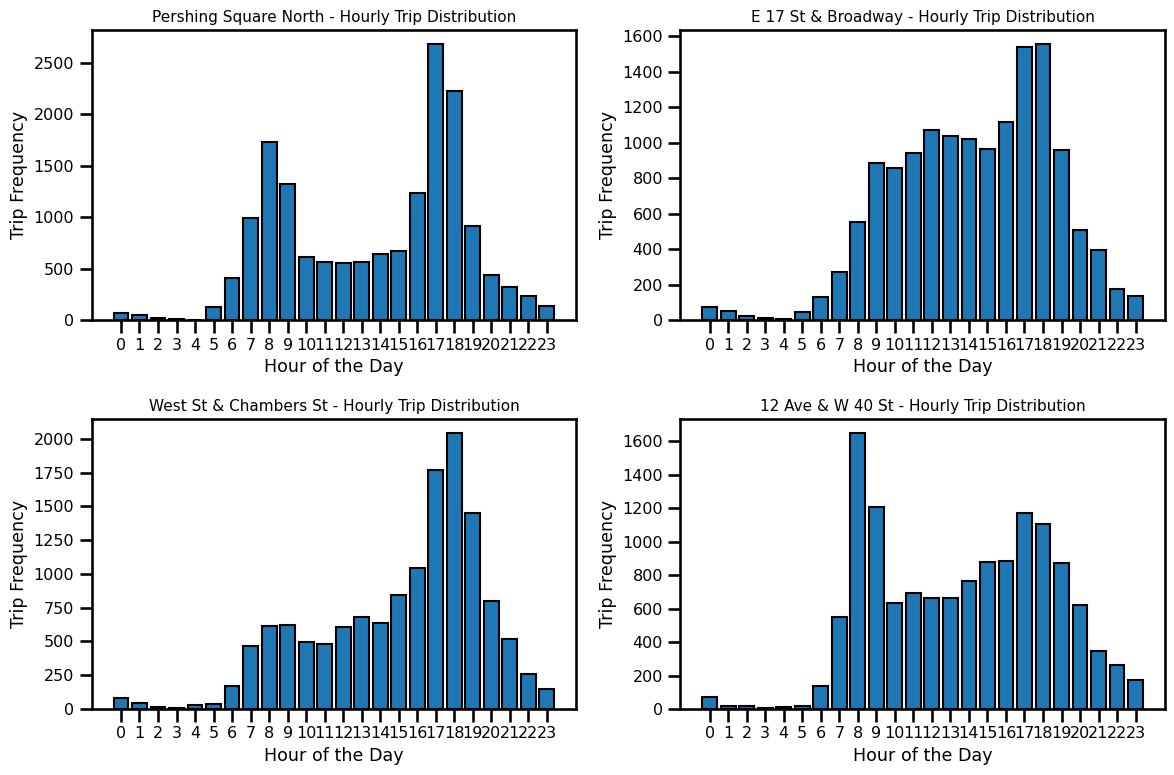

In [50]:
# Assuming df['starttime'] is a datetime column
df['hour'] = df['starttime'].dt.hour

# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=False)

# Iterate over the top 4 stations
for i, station in enumerate(station_counts['start station name'].head(4)):
    # Filter the dataframe for the current station and calculate hourly trip counts
    hour_counts = df[df['start station name'] == station]['hour'].value_counts().sort_index()

    row, col = i // 2, i % 2  # Calculate row and column for subplot based on index
    axes[row, col].bar(hour_counts.index, hour_counts.values, edgecolor='black')
    axes[row, col].set_xlabel('Hour of the Day')
    axes[row, col].set_ylabel('Trip Frequency')
    axes[row, col].set_title(f'{station} - Hourly Trip Distribution', fontsize=11)
    axes[row, col].set_xticks(range(24))  # Set x-ticks to cover all hours (0 to 23)

plt.tight_layout()
plt.show()


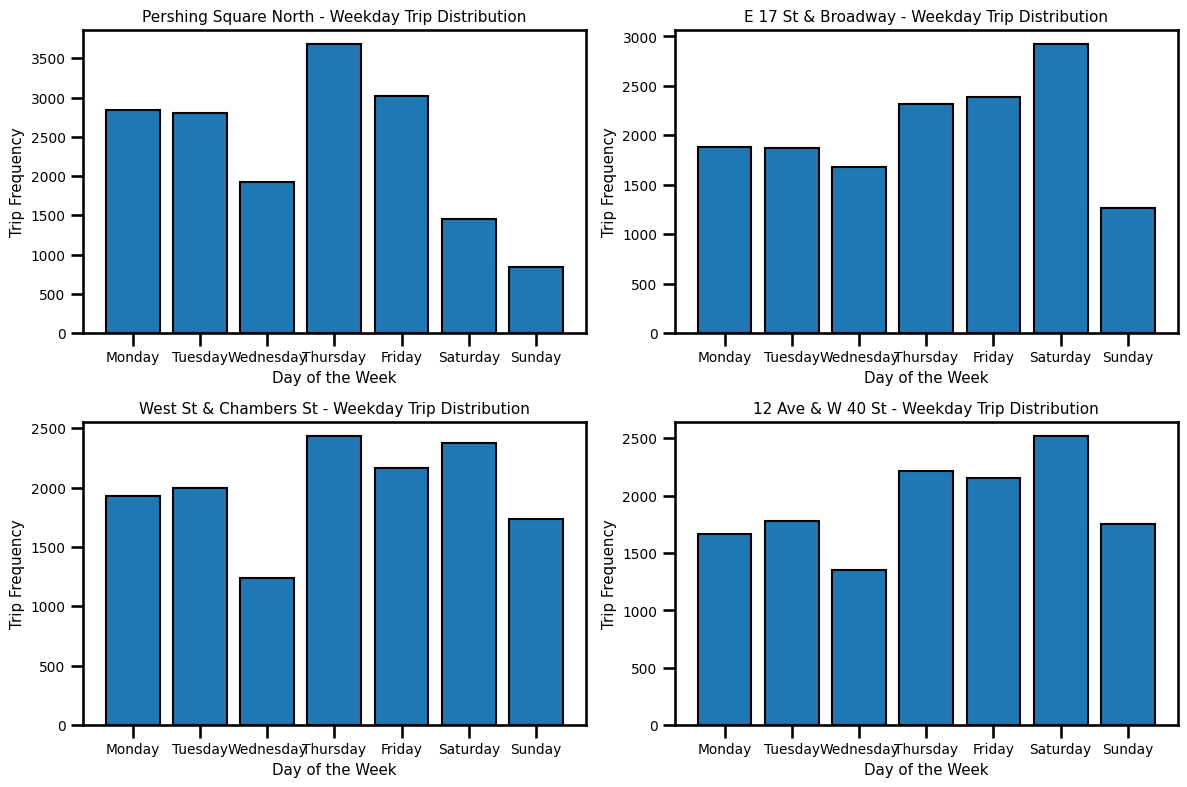

In [78]:
# Assuming df['starttime'] is a datetime column
df['weekday'] = df['starttime'].dt.weekday  # Extract weekday (0=Monday, 6=Sunday)

# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=False)

# Weekday labels for better readability
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Iterate over the top 4 stations
for i, station in enumerate(station_counts['start station name'].head(4)):
    # Filter the dataframe for the current station and calculate weekday trip counts
    weekday_counts = df[df['start station name'] == station]['weekday'].value_counts().sort_index()

    row, col = i // 2, i % 2  # Calculate row and column for subplot based on index
    axes[row, col].bar(weekday_counts.index, weekday_counts.values, edgecolor='black')
    axes[row, col].set_xlabel('Day of the Week')
    axes[row, col].set_ylabel('Trip Frequency')
    axes[row, col].set_title(f'{station} - Weekday Trip Distribution', fontsize=11)
    axes[row, col].set_xticks(range(7))  # Set x-ticks for days of the week
    axes[row, col].set_xticklabels(weekday_labels)  # Use weekday labels for better readability

plt.tight_layout()
plt.show()


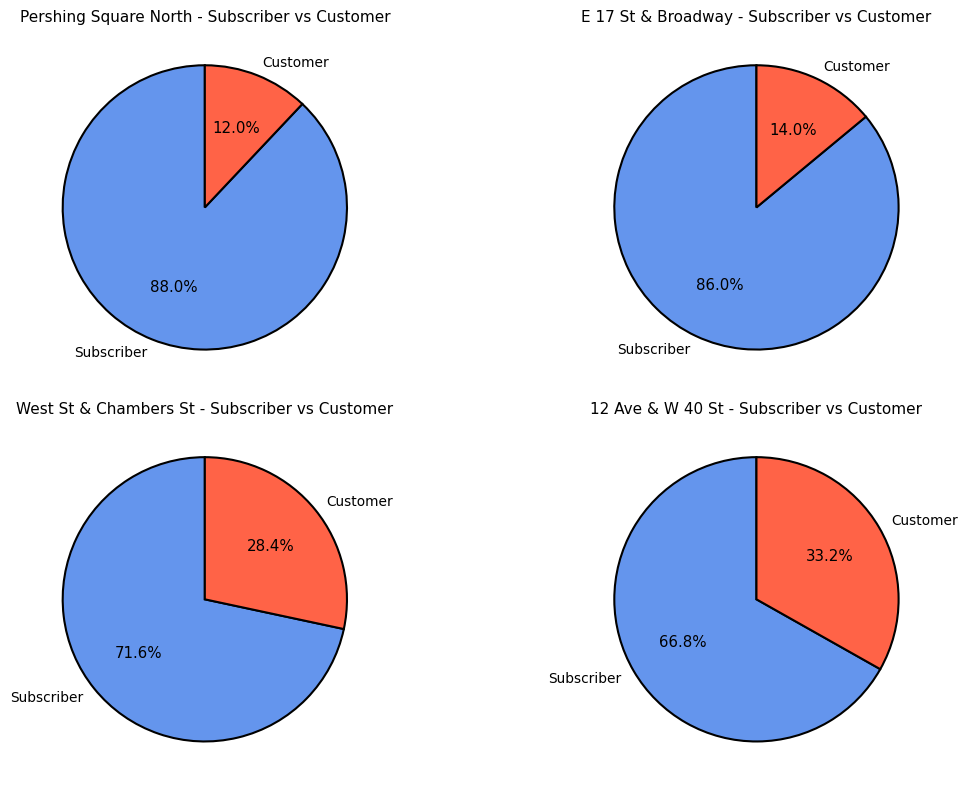

In [87]:
# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Iterate over the top 4 stations
for i, station in enumerate(station_counts['start station name'].head(4)):
    # Filter the dataframe for the current station and count subscribers and customers
    user_type_counts = df[df['start station name'] == station]['usertype'].value_counts()

    row, col = i // 2, i % 2  # Calculate row and column for subplot based on index
    axes[row, col].pie(user_type_counts.values, labels=user_type_counts.index, autopct='%1.1f%%', 
                       colors=['cornflowerblue', 'tomato'], startangle=90, wedgeprops={'edgecolor': 'black'})
    axes[row, col].set_title(f'{station} - Subscriber vs Customer', fontsize=11)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()


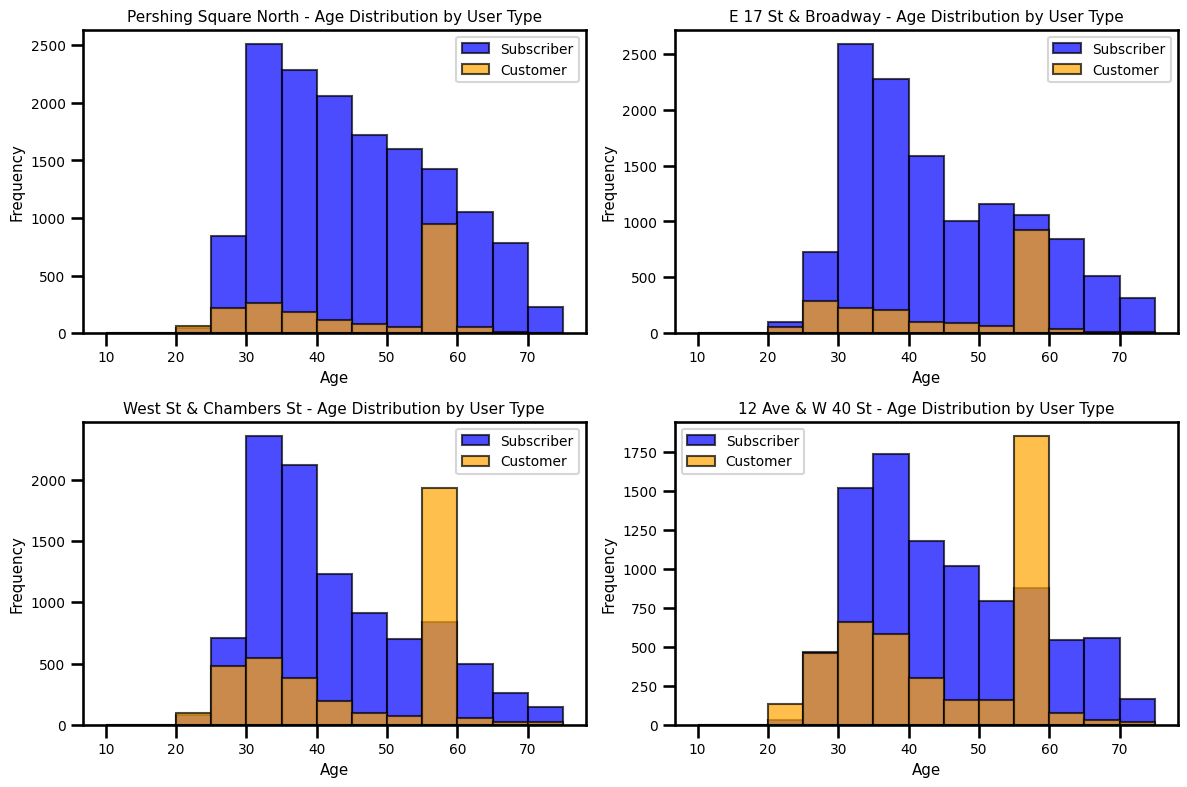

In [84]:
# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=False)

# Iterate over the top 4 stations
for i, station in enumerate(station_counts['start station name'].head(4)):
    # Filter the dataframe for the current station
    station_data = df[df['start station name'] == station]

    # Separate into subscribers and customers
    subscribers = station_data[station_data['usertype'] == 'Subscriber']['age']
    customers = station_data[station_data['usertype'] == 'Customer']['age']

    row, col = i // 2, i % 2  # Calculate row and column for subplot based on index
    axes[row, col].hist(subscribers, bins=range(10, 80, 5), alpha=0.7, label='Subscriber', color='blue', edgecolor='black')
    axes[row, col].hist(customers, bins=range(10, 80, 5), alpha=0.7, label='Customer', color='orange', edgecolor='black')

    axes[row, col].set_xlabel('Age')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'{station} - Age Distribution by User Type', fontsize=11)
    axes[row, col].legend()

plt.tight_layout()
plt.show()


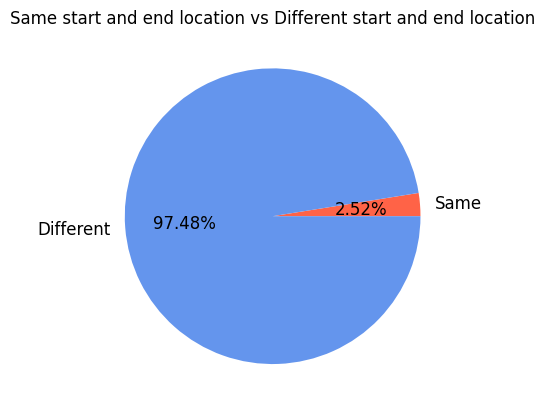

In [273]:
#number of trips that started and ended at same station
start_end_same = df[df['start station name']== df['end station name']].shape[0]

#number of trips that started and ended at different station
start_end_diff = df.shape[0]-start_end_same

plt.pie([start_end_same,start_end_diff], labels=['Same','Different'], 
        autopct='%1.2f%%', textprops={'fontsize': 12},colors=['tomato','cornflowerblue'])
plt.title('Same start and end location vs Different start and end location', fontsize=12)
plt.show()

### Time-based Analysis

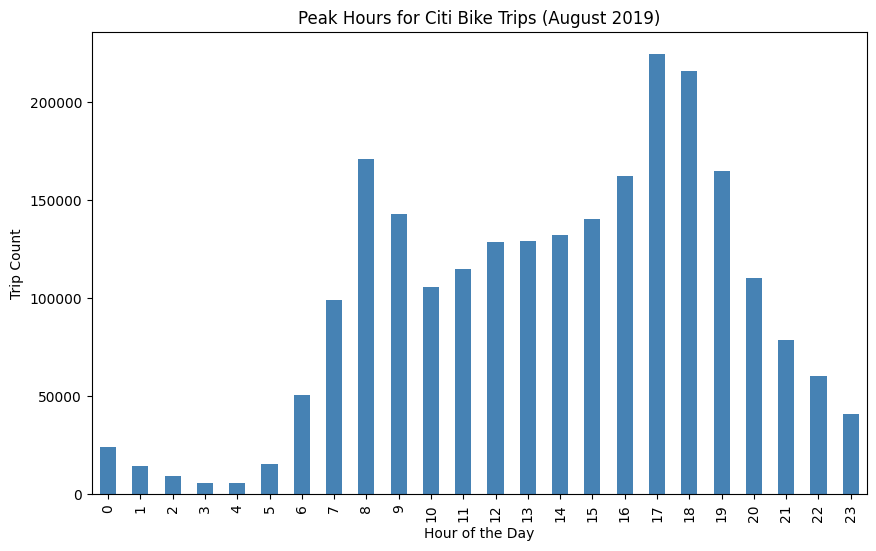

In [19]:
# Extracting hour and day of the week
df['hour']= df['starttime'].dt.hour
df['day_of_week']=df['starttime'].dt.day_name()

# Peak hours
peak_hours =df[df['usertype']==""]['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
peak_hours.plot(kind='bar', color='steelblue')
plt.title('Peak Hours for Citi Bike Trips (August 2019)')
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Count')
plt.show()

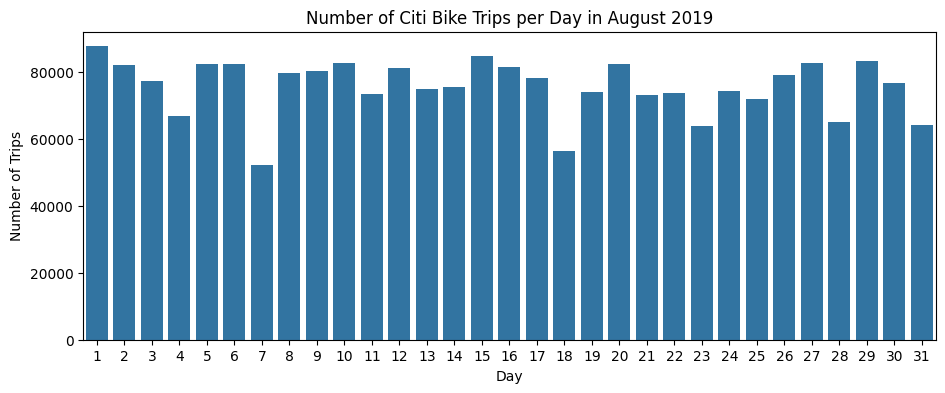

In [20]:
# Counting the number of trips per day in august 2019
daily_trips = pd.DataFrame(
    pd.to_datetime(
        df['starttime'], 
        errors='coerce'
    ).dt.day
).groupby('starttime').size().reset_index(name='trip_count')

# Create a bar plot
plt.figure(figsize=(11, 4))
sns.barplot(x='starttime',y='trip_count',data=daily_trips)
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.title('Number of Citi Bike Trips per Day in August 2019')
plt.show()

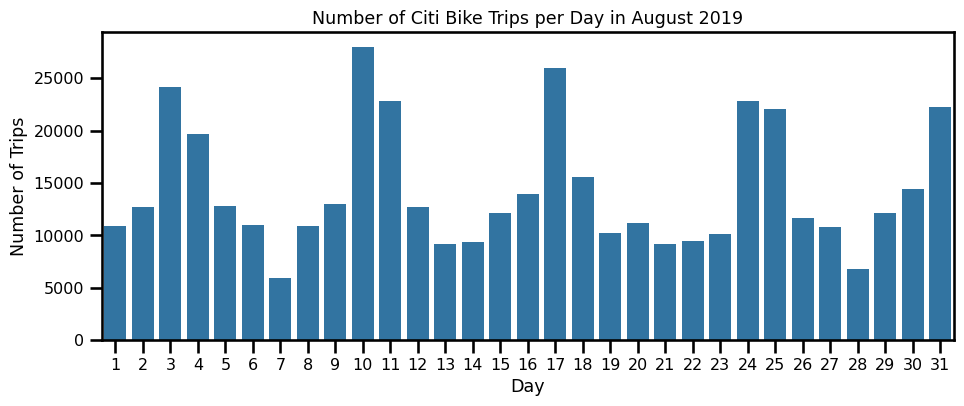

In [48]:
# Counting the number of trips per day in august 2019 cuuussstttommmmerrrssss
daily_trips = pd.DataFrame(
    pd.to_datetime(
        df[df['usertype']=="Customer"]['starttime'], 
        errors='coerce'
    ).dt.day
).groupby('starttime').size().reset_index(name='trip_count')

# Create a bar plot
plt.figure(figsize=(11, 4))
sns.barplot(x='starttime',y='trip_count',data=daily_trips)
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.title('Number of Citi Bike Trips per Day in August 2019')
plt.show()

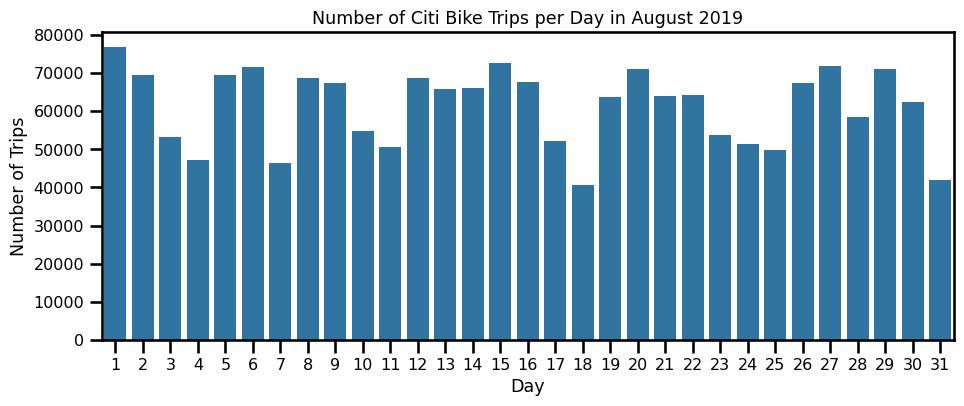

In [49]:
# Counting the number of trips per day in august 2019 cuuussstttommmmerrrssss
daily_trips = pd.DataFrame(
    pd.to_datetime(
        df[df['usertype']=="Subscriber"]['starttime'], 
        errors='coerce'
    ).dt.day
).groupby('starttime').size().reset_index(name='trip_count')

# Create a bar plot
plt.figure(figsize=(11, 4))
sns.barplot(x='starttime',y='trip_count',data=daily_trips)
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.title('Number of Citi Bike Trips per Day in August 2019')
plt.show()

- Day and night usage view

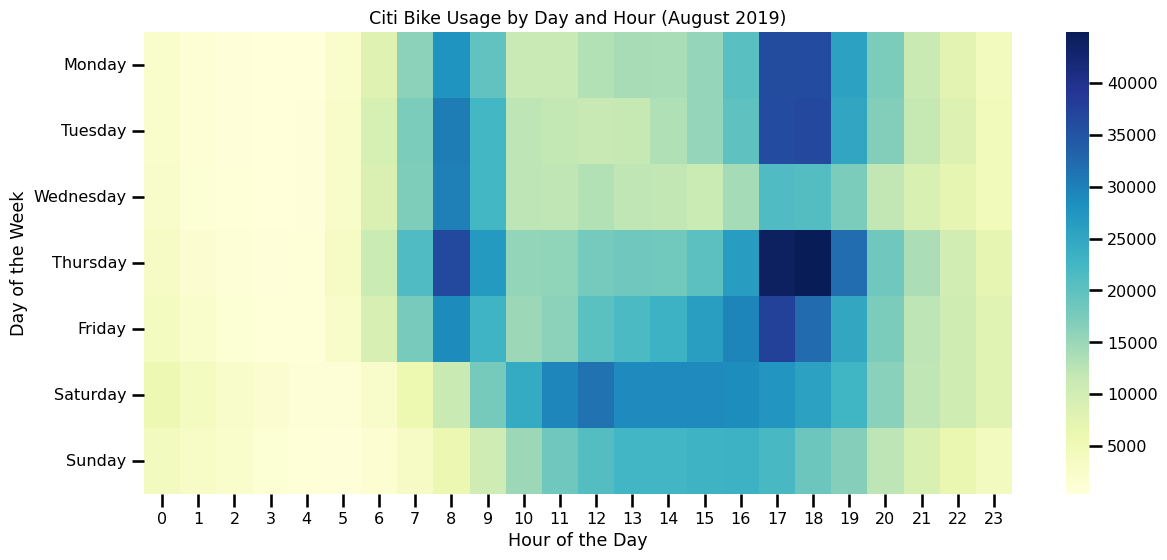

In [35]:
sns.set_context("talk", font_scale=0.7)

# Extracting hour and day of the week
df['hour']= df['starttime'].dt.hour
df['day_of_week']=df['starttime'].dt.day_name()

# preparing week days and hour grouped data
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 

df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True) # ordering by week day 
day_night_usage = df.groupby(['day_of_week', 'hour']).size().unstack().fillna(0)

# plotting heatmap of the week days and hours
plt.figure(figsize=(14, 6))
sns.heatmap(day_night_usage, cmap="YlGnBu", cbar=True)
plt.title('Citi Bike Usage by Day and Hour (August 2019)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

### Trip Duration Analysis

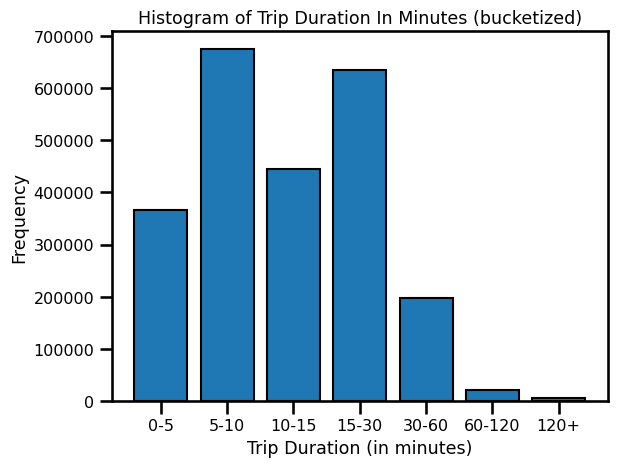

In [36]:
sns.set_context("talk", font_scale=0.7)

# Selecting bin edges and labels for trip duration in minutes
bin_edges = [0, 5, 10, 15, 30, 60, 120, 300]
labels = ['0-5', '5-10', '10-15', '15-30', '30-60', '60-120', '120+']

# Creating binned durations in minutes
hist, edges = np.histogram(df['tripduration']/60, bins=bin_edges)

# ploting Histogram to see the distribution of the trip durations in minutes
plt.bar(labels, hist, edgecolor='black')
plt.xticks(rotation=0)
plt.xlabel('Trip Duration (in minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Duration In Minutes (bucketized)')
plt.show()

## Assessment Questions

### ***Q1:*** How do the user types differ with respect to their Age and Gender? Do you think the data is equally reliable for both types?

_______________________________________________________________________________________________________________________

#### Gender Investigation:

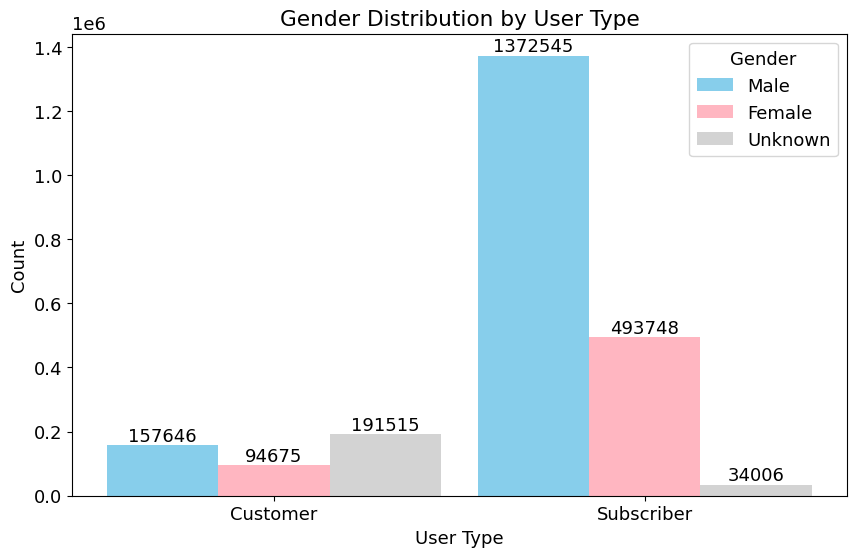

In [10]:
from matplotlib import rcParams

# Setting font properties globally
rcParams['font.size'] = 13         # Set the font size for all text in the plot


#replacing gender values with the labels of each gender
df['gender'] = df['gender'].replace({1: 'Male', 2: 'Female', 0: 'Unknown'})

#counting the occurrences of each gender in each user type
gender_counts = df.groupby(['usertype','gender']).size().unstack()

bar_width = 0.3
index = np.arange(len(gender_counts))

#plotting bars for each gender
plt.figure(figsize=(10, 6))
bars_male = plt.bar(index - bar_width, gender_counts['Male'], bar_width, label='Male', color='skyblue')
bars_female = plt.bar(index, gender_counts['Female'], bar_width, label='Female', color='lightpink')
bars_unknown = plt.bar(index + bar_width, gender_counts['Unknown'], bar_width, label='Unknown', color='lightgray')

#adding counts on top of each bar
add_bar_count(bars_male) 
add_bar_count(bars_female) 
add_bar_count(bars_unknown) 

plt.title('Gender Distribution by User Type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.xticks(index, gender_counts.index, rotation=0)  # Set x-axis labels
plt.legend(title='Gender')
plt.show()

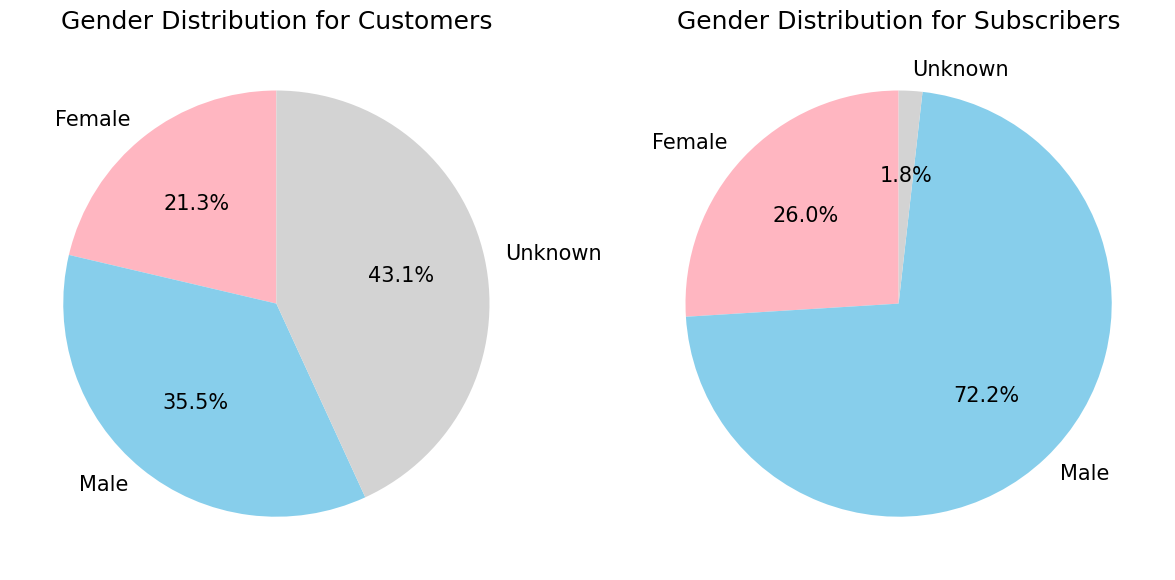

In [24]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Setting font properties globally
rcParams['font.size'] = 15         # Set the font size for all text in the plot
# Replace gender values with the labels of each gender
df['gender'] = df['gender'].replace({1: 'Male', 2: 'Female', 0: 'Unknown'})

# Counting the occurrences of each gender for each user type
gender_counts = df.groupby(['usertype', 'gender']).size().unstack()

# Plot pie charts for each user type
user_types = ['Customer', 'Subscriber']

plt.figure(figsize=(12, 6))

for i, user_type in enumerate(user_types):
    plt.subplot(1, 2, i + 1)  # Create a subplot for each user type
    counts = gender_counts.loc[user_type]
    
    # Plot pie chart
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightpink', 'skyblue', 'lightgray'])
    plt.title(f'Gender Distribution for {user_type}s')

plt.tight_layout()
plt.show()


- **Observations:**

    **1.** **Customers** data have a high proportion of unknown gender entries **(*191,515*)**, which suggests that there might be a report issue for the customers data.

    **2.** **Subscribers** have much fewer unknwon entries **(*34,006*)** in comparison to the **customer** user types. Which makes the **subscribers** data more reliable.  
    

- **Conclusion:** The gender data is **more reliable** for the **subscriber** user types than the customer user types due to the higher proportion of unknown entries in the customer user types.

#### Age investigation:

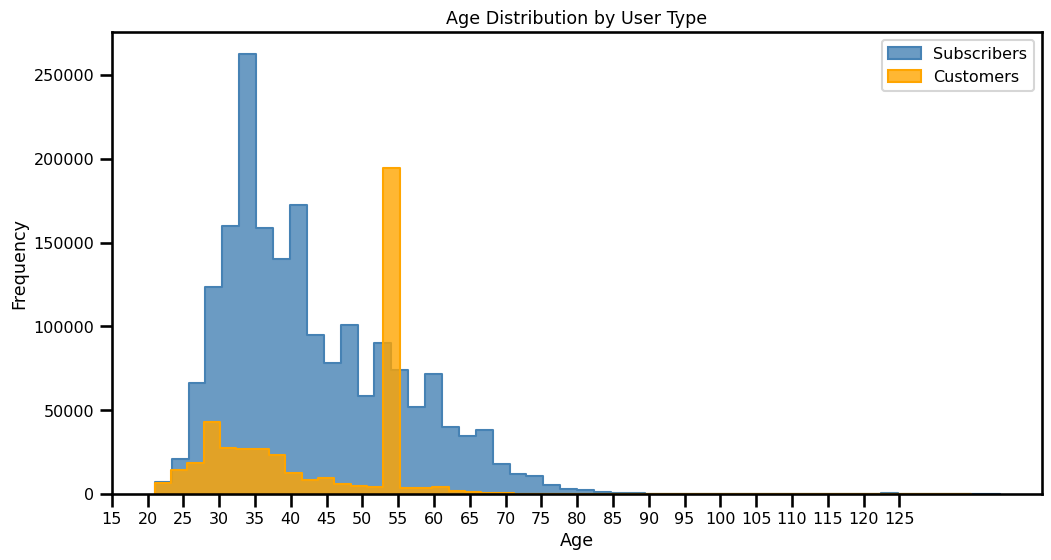

In [57]:
from matplotlib import rcParams

# Setting font properties globally
rcParams['font.size'] = 13         # Set the font size for all text in the plot

#filtering user types to us each data of them separately
subscribers = df[df['usertype'] == 'Subscriber']
customers = df[df['usertype'] == 'Customer']

#plotting age distribution for both user types
plt.figure(figsize=(12, 6))
sns.histplot(subscribers['age'], bins=50,color='steelblue', label='Subscribers', alpha=0.8, element="step")
sns.histplot(customers['age'], bins=50,color='orange', label='Customers', alpha=0.8, element="step")
plt.title('Age Distribution by User Type')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(np.arange(15, 130, 5))
plt.show()

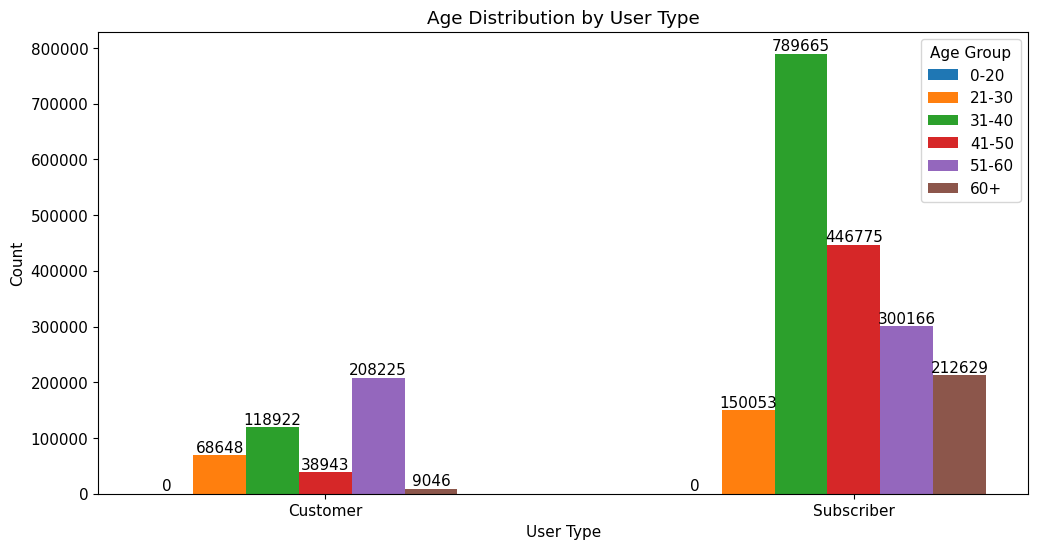

In [19]:
from matplotlib import rcParams

# Setting font properties globally
rcParams['font.size'] = 11         # Set the font size for all text in the plot

#defining bins and making a column for age group 
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

#counting the occurrences of each age group for each user type
age_group_counts = df.groupby(['usertype','age_group']).size().unstack()

bar_width = 0.1
index = np.arange(len(age_group_counts.index))

# plotting bars for each age group
plt.figure(figsize=(12, 6))
for i, age_group in enumerate(age_group_counts.columns):
    bars = plt.bar(index + i * bar_width, age_group_counts[age_group], bar_width, label=age_group)
    add_bar_count(bars)     # adding counts on top of each bar

plt.title('Age Distribution by User Type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.xticks(index + bar_width * len(age_group_counts.columns) / 2, age_group_counts.index, rotation=0)
plt.legend(title='Age Group')
plt.show()

* **Observation:**

    **1-  Customers user types:**
     * The most dominant age group is the **51-60** age group, which is not normal for bike sharing services where younger users are generally more dominant.
     * Missing young users of the **0-20** age group, which might be a service restriction.
     
     
     **2- Subscribers user types:**
     * The most dominant age group is the **31-40** age group; this suggests that the subscribers data is likely more reliable than customers data.
     * Similar to the customers data, ther are no young users in the **0-20** age group, which might be a service restriction.

### **- Investigations:**
- Issues with Customer Data:
Age Data: 190,374 records (42.89% of the customer data) show an age of 55, which may indicate a default or improperly recorded value. 

- Gender Data: 191,515 records (43.1% of the customer data) have an unknown gender, further indicating unreliable data collection.

- Overlap:
Out of these, 188,135 rows show both an age of 55 and an unknown gender, highlighting a significant overlap of potentially unreliable records.

### - Conclusion:
The customer data appears to have a large portion of unreliable or improperly recorded information, especially in terms of age and gender. While the subscriber data seems to be more consistent and reliable.

_______________________________________________________________________________________________________________________

### ***Q2:*** How is overall service usage distributed over time (hours of the day, day of the week)? Do subscribers & customers have different usage patterns? 

_______________________________________________________________________________________________________________________

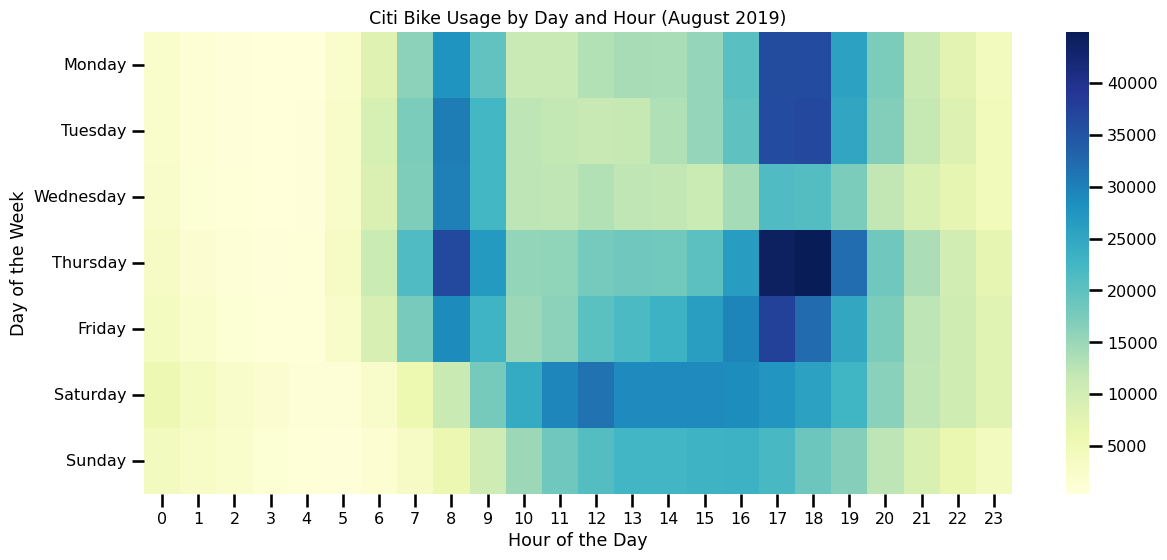

In [37]:
sns.set_context("talk", font_scale=0.7)
#preparing week days and hour grouped data
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] 
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True) #ordering by week day
day_night_usage = df.groupby(['day_of_week', 'hour']).size().unstack().fillna(0)

# plotting heatmap of the week days and hours
plt.figure(figsize=(14, 6))
sns.heatmap(day_night_usage, cmap="YlGnBu", cbar=True)
plt.title('Citi Bike Usage by Day and Hour (August 2019)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

## **- Observations:**
- **Weekday Usage:** The peak hours are between 07:00 and 09:00 and between 17:00 and 19:00 which is the rush hours for work which conclude that the service is mostly used for work transportations, also usage is low during the early morning and late evening hours.
- **Weekend Usage:** Weekends (Sunday and Saturday) are having peak hours at the middle of the day as there are no work at weekends

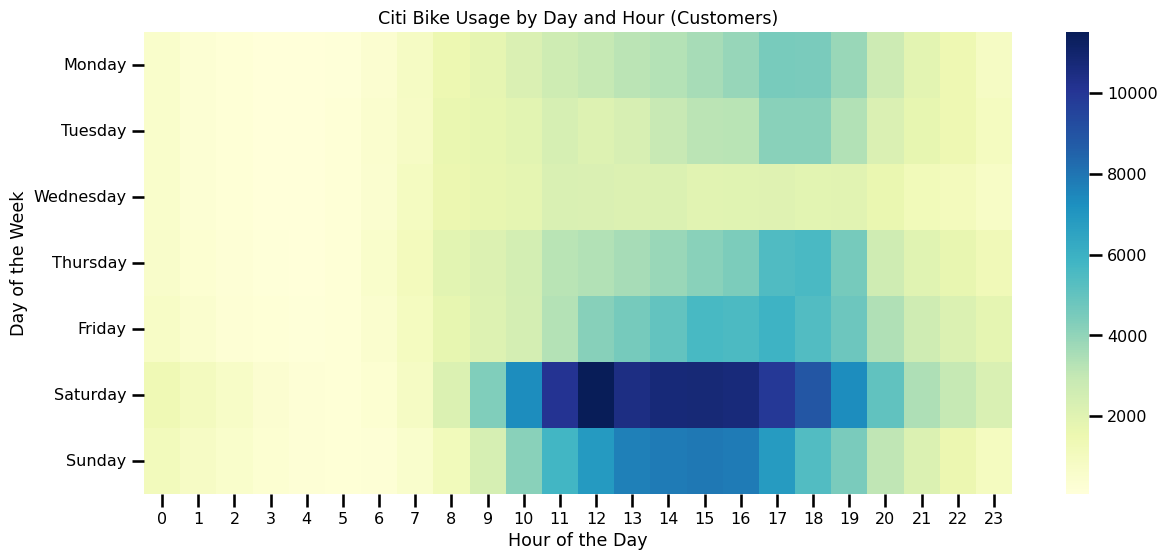

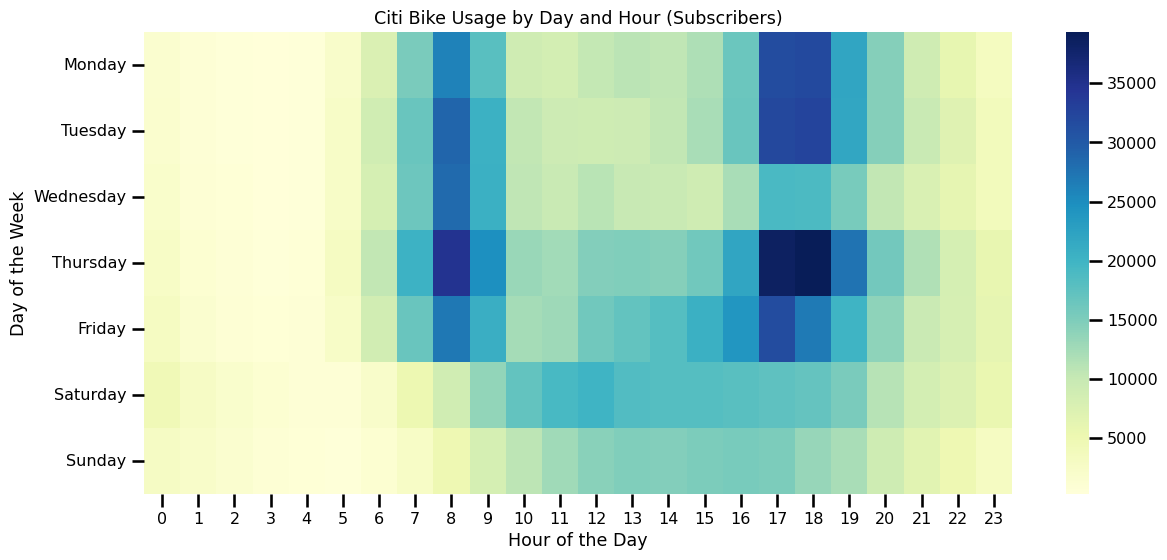

In [37]:
sns.set_context("talk", font_scale=0.7)
# visualizing the same figure but separated for customers and subscribers
df_customers = df[df['usertype'] == 'Customer']
df_subscribers = df[df['usertype'] == 'Subscriber']

# grouping data by week days and hour for customers and subscribers
day_night_usage_customers = df_customers.groupby(['day_of_week', 'hour']).size().unstack().fillna(0)
day_night_usage_subscribers = df_subscribers.groupby(['day_of_week', 'hour']).size().unstack().fillna(0)

#ploting heatmap for Customers
plt.figure(figsize=(14, 6))
sns.heatmap(day_night_usage_customers, cmap="YlGnBu", cbar=True)
plt.title('Citi Bike Usage by Day and Hour (Customers)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

#plot heatmap for Subscribers
plt.figure(figsize=(14, 6))
sns.heatmap(day_night_usage_subscribers, cmap="YlGnBu", cbar=True)
plt.title('Citi Bike Usage by Day and Hour (Subscribers)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

**- Observation:**
- Yes, very clear difference where:
Subscribers use it for work transportation as their peak usage is the weekdays at morning and end of day.
While Customers have higher usage during weekends (Sunday and Saturday) which suggests that they use it for fun activities.

### **- Conclusion of the investigation:**
Overall, the service is mostly used for work transportations. while customers tend to use Citi Bike more for fun activities and have a more flexible usage pattern, while subscribers primarily use the service for commuting and have a more consistent usage pattern throughout the weekdays.

_______________________________________________________________________________________________________________________

### ***Q3:*** What are the most frequently used trips? Are they different for subscribers and customers?

_______________________________________________________________________________________________________________________

In [40]:
df['trip_type'] = df['start station name']+' -> '+df['end station name']

#grouping data by trip type
trip_counts = df.groupby(['trip_type']).size().reset_index(name='count')

# sorting trips in ascending order
trip_counts = trip_counts.sort_values(by='count', ascending=False).reset_index(drop=True)

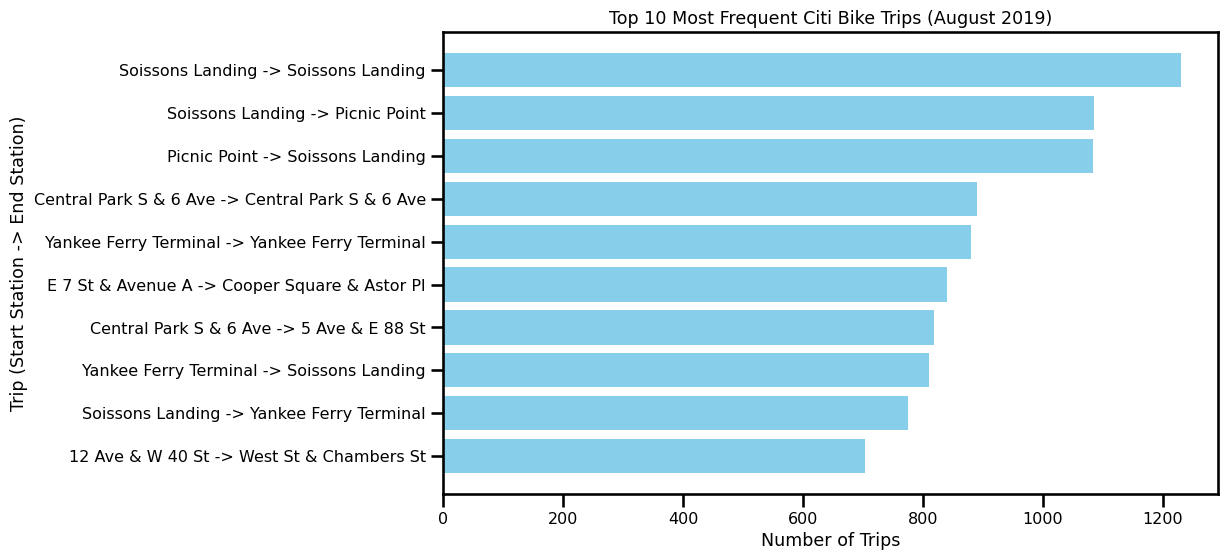

In [41]:
# top 10 trip types
plt.figure(figsize=(10, 6))
plt.barh(trip_counts['trip_type'].head(10), trip_counts['count'].head(10), color='skyblue')
plt.xlabel('Number of Trips')
plt.ylabel('Trip (Start Station -> End Station)')
plt.title('Top 10 Most Frequent Citi Bike Trips (August 2019)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest values at the top
plt.show()

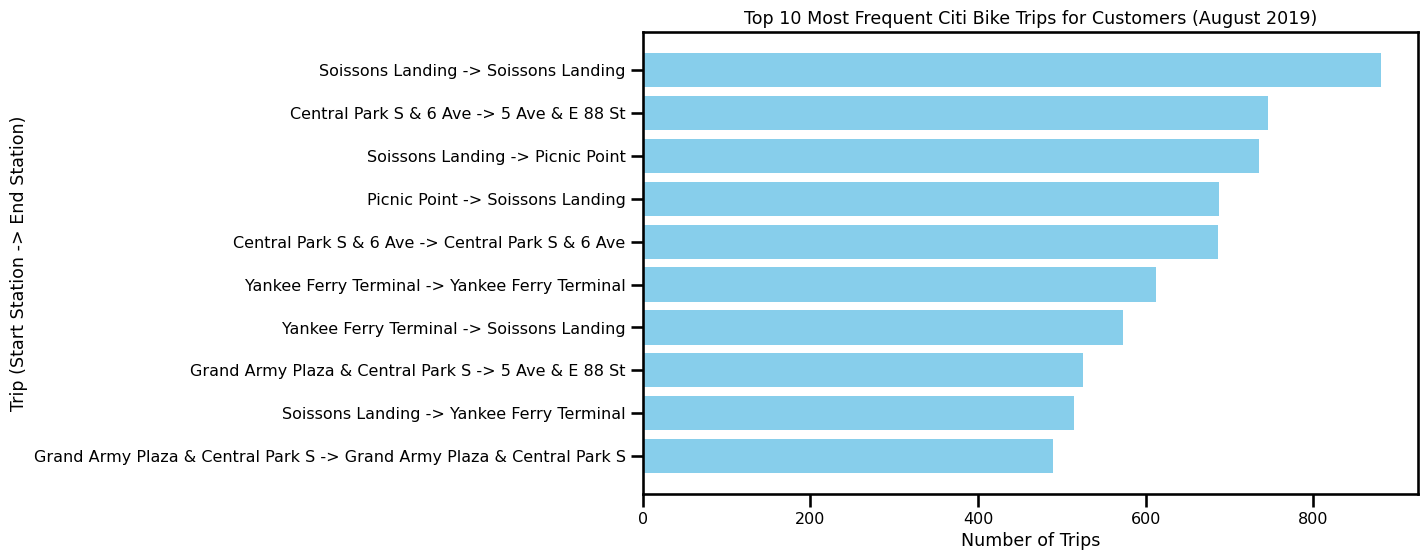

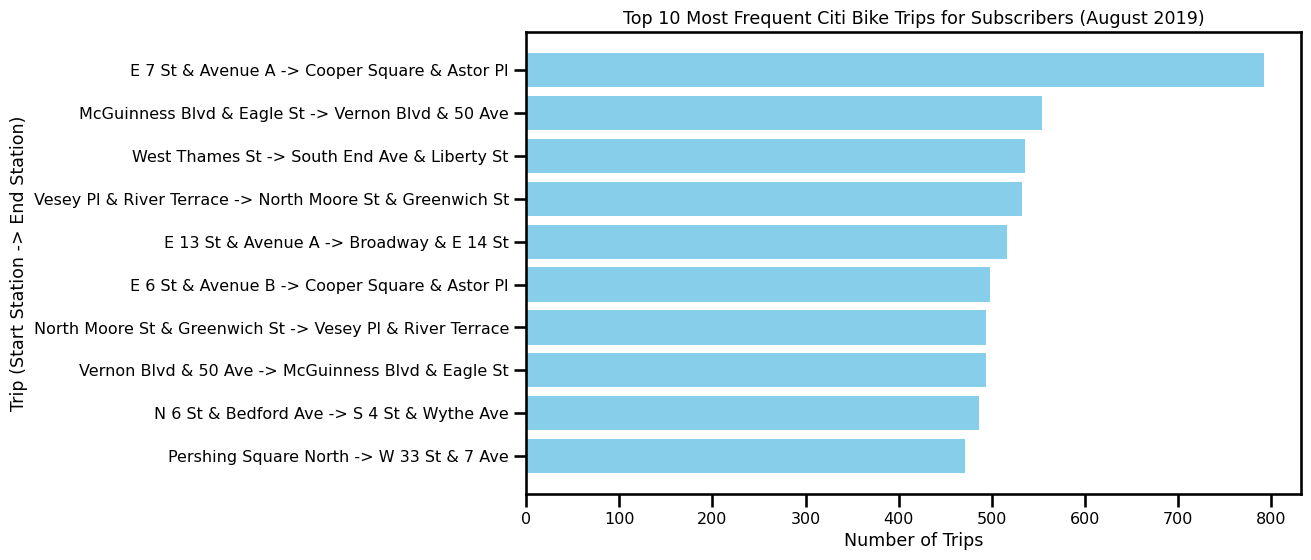

In [46]:
from matplotlib import rcParams

# Setting font properties globally
rcParams['font.size'] = 15         # Set the font size for all text in the plot

# Subscribers vs customers
df_cust = df[df['usertype']=="Customer"]
trip_counts_cust = df_cust.groupby(['trip_type']).size().reset_index(name='count')
trip_counts_cust = trip_counts_cust.sort_values(by='count', ascending=False).reset_index(drop=True)

df_subsc = df[df['usertype']=="Subscriber"]
trip_counts_subsc = df_subsc.groupby(['trip_type']).size().reset_index(name='count')
trip_counts_subsc = trip_counts_subsc.sort_values(by='count', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
rcParams['font.size'] = 15         # Set the font size for all text in the plot
plt.barh(trip_counts_cust['trip_type'].head(10), trip_counts_cust['count'].head(10), color='skyblue')
plt.xlabel('Number of Trips')
plt.ylabel('Trip (Start Station -> End Station)')
plt.title('Top 10 Most Frequent Citi Bike Trips for Customers (August 2019)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest values at the top
plt.show()

rcParams['font.size'] = 15         # Set the font size for all text in the plot
plt.figure(figsize=(10, 6))
plt.barh(trip_counts_subsc['trip_type'].head(10), trip_counts_subsc['count'].head(10), color='skyblue')
plt.xlabel('Number of Trips')
plt.ylabel('Trip (Start Station -> End Station)')
plt.title('Top 10 Most Frequent Citi Bike Trips for Subscribers (August 2019)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest values at the top
plt.show()

### **- Conclusion of the investigation:**
Customers and subscribers top 10 trips are different as subscribers trips are mostly to and from companies and commercial areas while customers are going to and from parks and open places that are far from companies.

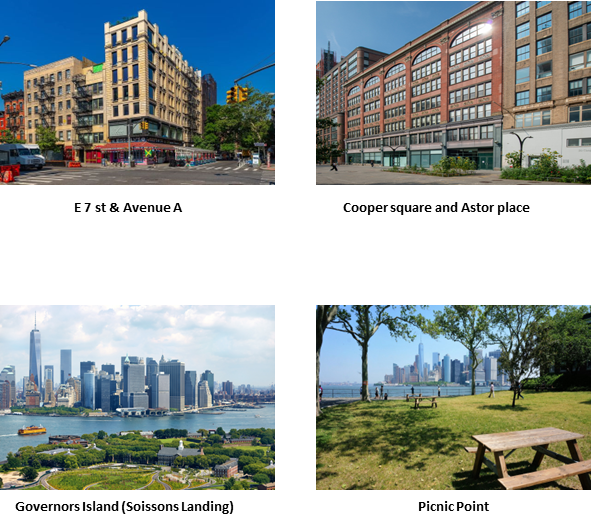

_______________________________________________________________________________________________________________________

## ***Q4:*** Investigate the distribution of the trip durations for the whole dataset and for a few frequently used stations?

_______________________________________________________________________________________________________________________

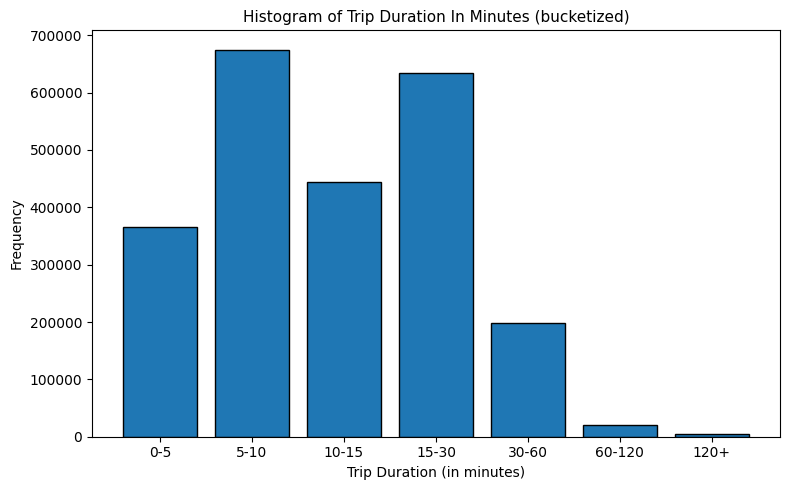

In [307]:
#defining age bins and labels
bin_edges_duration = [0, 5, 10, 15, 30, 60, 120, 300]
labels_duration = ['0-5', '5-10', '10-15', '15-30', '30-60', '60-120', '120+']

#plotting a hisogram for the trip duration in minutes
plt.figure(figsize=(8, 5))
hist, _ = np.histogram(df['tripduration'] / 60, bins=bin_edges_duration)
plt.bar(labels_duration, hist, edgecolor='black')
plt.xlabel('Trip Duration (in minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Duration In Minutes (bucketized)', fontsize=11)
plt.tight_layout()
plt.show()

#### Top 4 stations trip durations

In [306]:
# getting the most frequent stations used
station_counts = df.groupby('start station name').size().reset_index(name='count').sort_values(by='count', ascending=False).reset_index(drop=True)
station_counts = station_counts.sort_values(by='count', ascending=False).reset_index(drop=True)
station_counts.head(4)

start station name  count
0  Pershing Square North  16564
1     E 17 St & Broadway  14345
2  West St & Chambers St  13875
3       12 Ave & W 40 St  13435

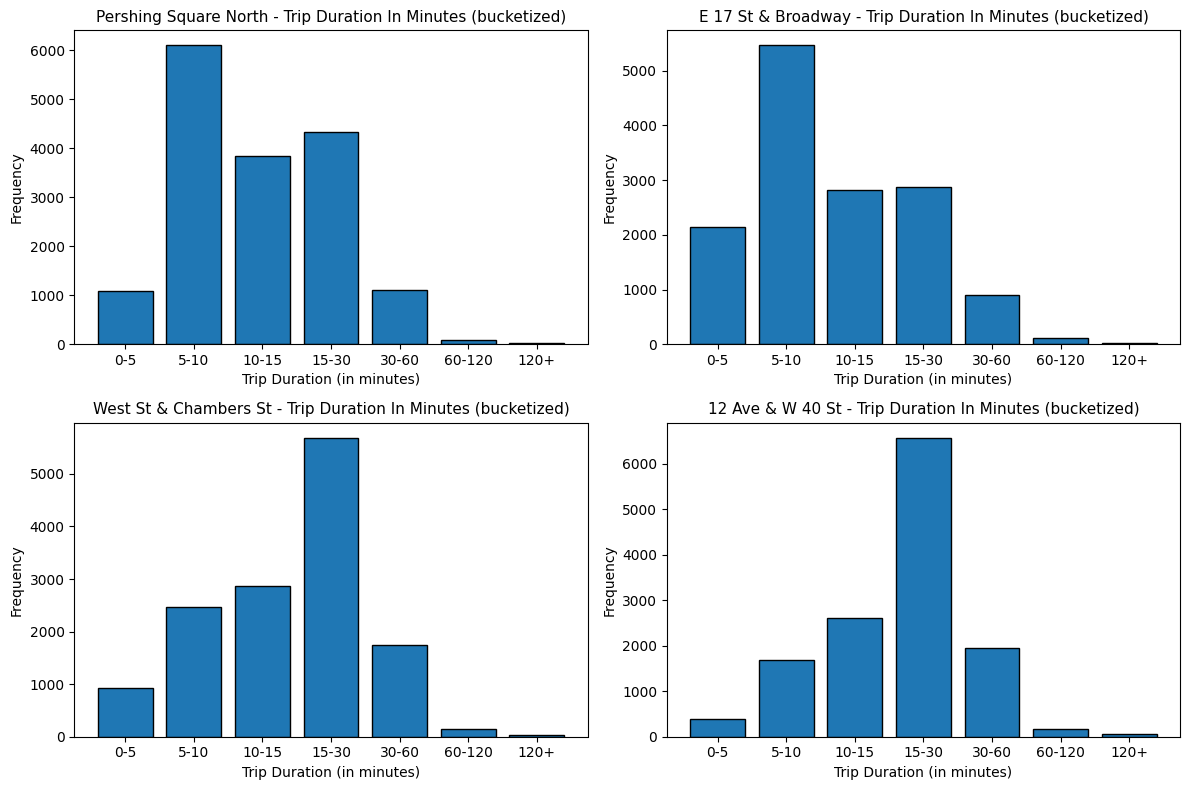

In [308]:
# Trip duration distribution for the top 4 stations

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=False)
for i, station in enumerate(station_counts['start station name'].head(4)):  # head(4) to match subplot size
    hist, edges = np.histogram(df[df['start station name'] == station]['tripduration'] / 60, bins=bin_edges)
    row, col = i // 2, i % 2  # Calculate row and column for subplot based on index
    axes[row, col].bar(labels_duration, hist, edgecolor='black')
    axes[row, col].set_xlabel('Trip Duration (in minutes)')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'{station} - Trip Duration In Minutes (bucketized)', fontsize=11)

plt.tight_layout()
plt.show()

#### Difference between user types

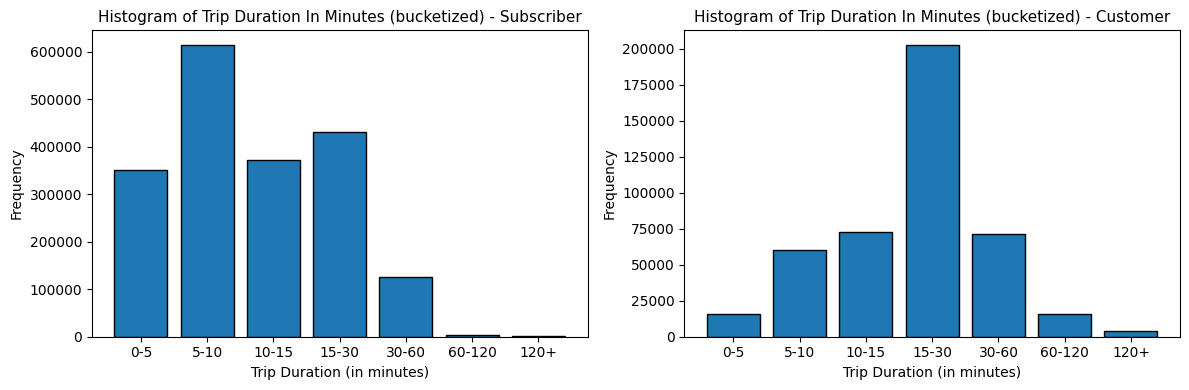

In [ ]:
# Trip duration distribution for customers and subscribers

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)
for i, user_type in enumerate(user_types):
    filtered_data = df[df['usertype'] == user_type]['tripduration'] / 60
    hist, _ = np.histogram(filtered_data, bins=bin_edges_duration)
    axes[i].bar(labels_duration, hist, edgecolor='black')
    axes[i].set_xlabel('Trip Duration (in minutes)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of Trip Duration In Minutes (bucketized) - {user_type}', fontsize=11)

plt.tight_layout()
plt.show()

### **- Conclusion of the investigation:**
**Subscribers:**

- Most frequent trip duration: 5-10 min.
- Frequency: shorter trips are the majority, and few trips exceed an hour.

**Customers:**

- Most frequent Trip Duration: 15-30 mins
- Frequency: wider range of trip durations, also there are a greater number of trips that last longer than an hour.

**most of the Subscribers trips are short which indicates that they might use it for work transportion, while customers have wider range of trip durations and take also more long trips.**

## Advanced Questions:

### ***Q1:*** Take a look at the subscribers during working days of the week (Mo. - Fr.). Visualize the average number of rentals and returns per hour for the most frequently used stations.

In [15]:
df_pattern.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'age', 'rental_hour', 'return_hour'],
      dtype='object')

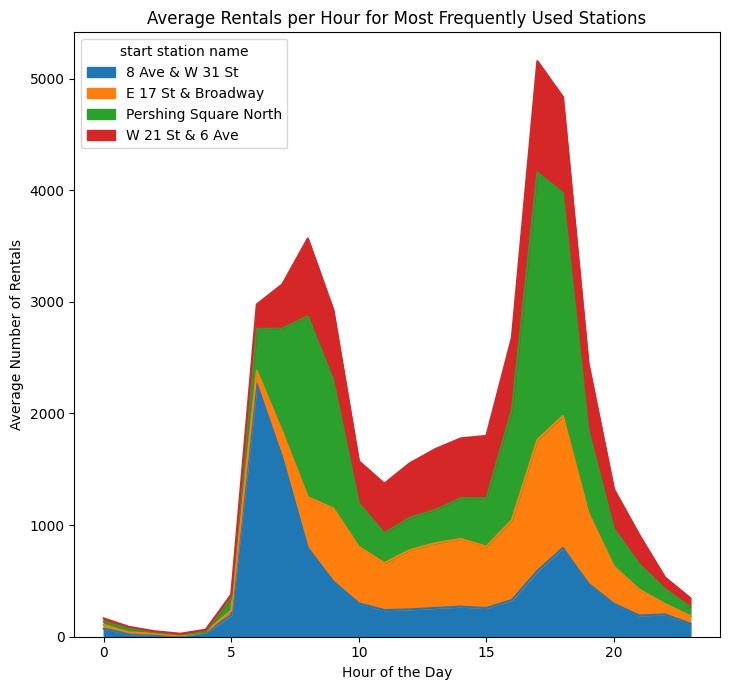

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert datetime columns to datetime objects
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Extract hour from datetime
df['rental_hour'] = df['starttime'].dt.hour
df['return_hour'] = df['stoptime'].dt.hour

# Filter for working days (Monday to Friday) and subscribers
df_pattern = df[(df['starttime'].dt.dayofweek < 5)&(df['usertype']=='Subscriber')]

# Get the most frequently used stations
most_frequent_stations = df_pattern['start station name'].value_counts().head(4).index

# Filter the dataset for these stations
df_filtered = df_pattern[df_pattern['start station name'].isin(most_frequent_stations)]

# Group by station and rental hour and calculate average rentals per hour
rentals_per_hour = df_filtered.groupby(['start station name', 'rental_hour']).size().reset_index(name='count')
rentals_pivot = rentals_per_hour.pivot_table(index='rental_hour', columns='start station name', values='count', fill_value=0)

# Group by station and return hour and calculate average returns per hour
returns_per_hour = df_filtered.groupby(['end station name', 'return_hour']).size().reset_index(name='count')
returns_pivot = returns_per_hour.pivot_table(index='return_hour', columns='end station name', values='count', fill_value=0)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot rentals per hour
plt.subplot(1, 2, 1)
rentals_pivot.plot(kind='area', stacked=True, ax=plt.gca())
plt.title('Average Rentals per Hour for Most Frequently Used Stations')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Rentals')

# # Plot returns per hour
# plt.subplot(1, 2, 2)
# returns_pivot.plot(kind='area', stacked=True, ax=plt.gca())
# plt.title('Average Returns per Hour for Most Frequently Used Stations')
# plt.xlabel('Hour of the Day')
# plt.ylabel('Average Number of Returns')

plt.tight_layout()
plt.show()


In [10]:
# filtering days to inc;ude only (Monday to Friday) and user type Subscribers
df_weekdays = df[(df['starttime'].dt.dayofweek < 5)&(df['usertype']=='Subscriber')]

#number of rentals and returns per station
rental_counts = df_weekdays['start station name'].value_counts()
return_counts = df_weekdays['end station name'].value_counts()

In [11]:
station_usage = pd.DataFrame({
    'rentals': rental_counts,
    'returns': return_counts
}).fillna(0)

#getting top stations
top_stations = station_usage.nlargest(5, 'rentals').index

In [12]:
warnings.filterwarnings('ignore')

#data for top stations
df_top_stations = df_weekdays[df_weekdays['start station name'].isin(top_stations)]

#getting hours from starttime and stoptime
df_top_stations['hour_start'] = df_top_stations['starttime'].dt.hour
df_top_stations['hour_end'] = df_top_stations['stoptime'].dt.hour

#grouping by station name and hour for rental and returns
rentals_per_hour = df_top_stations.groupby(['start station name', 'hour_start']).size().reset_index(name='rentals')
returns_per_hour = df_top_stations.groupby(['end station name', 'hour_end']).size().reset_index(name='returns')

#pivoting both to be able to visualize them
rentals_per_hour_pivot = rentals_per_hour.pivot_table(index='hour_start', columns='start station name', values='rentals', aggfunc='mean')
returns_per_hour_pivot = returns_per_hour.pivot_table(index='hour_end', columns='end station name', values='returns', aggfunc='mean')

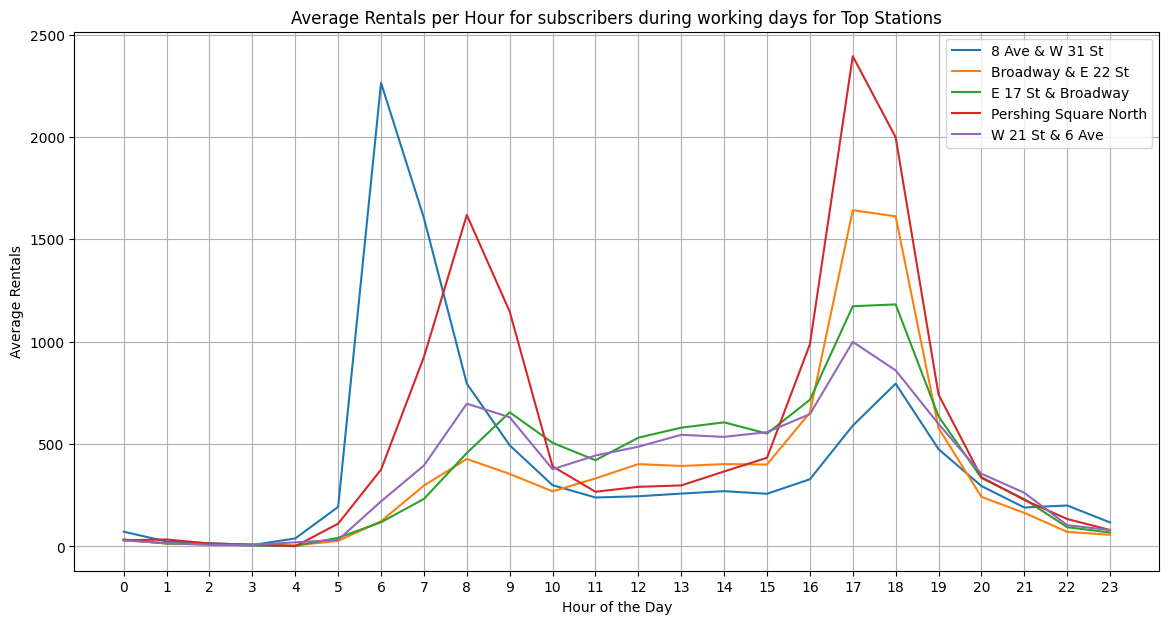

In [13]:
#plotting a graph to show the distribution of the hours for rental
plt.figure(figsize=(14, 7))
for station in rentals_per_hour_pivot.columns:
    plt.plot(rentals_per_hour_pivot.index, rentals_per_hour_pivot[station], label=station)

plt.xticks(ticks=rentals_per_hour_pivot.index)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.title('Average Rentals per Hour for subscribers during working days for Top Stations')
plt.legend()
plt.grid(True)
plt.show()

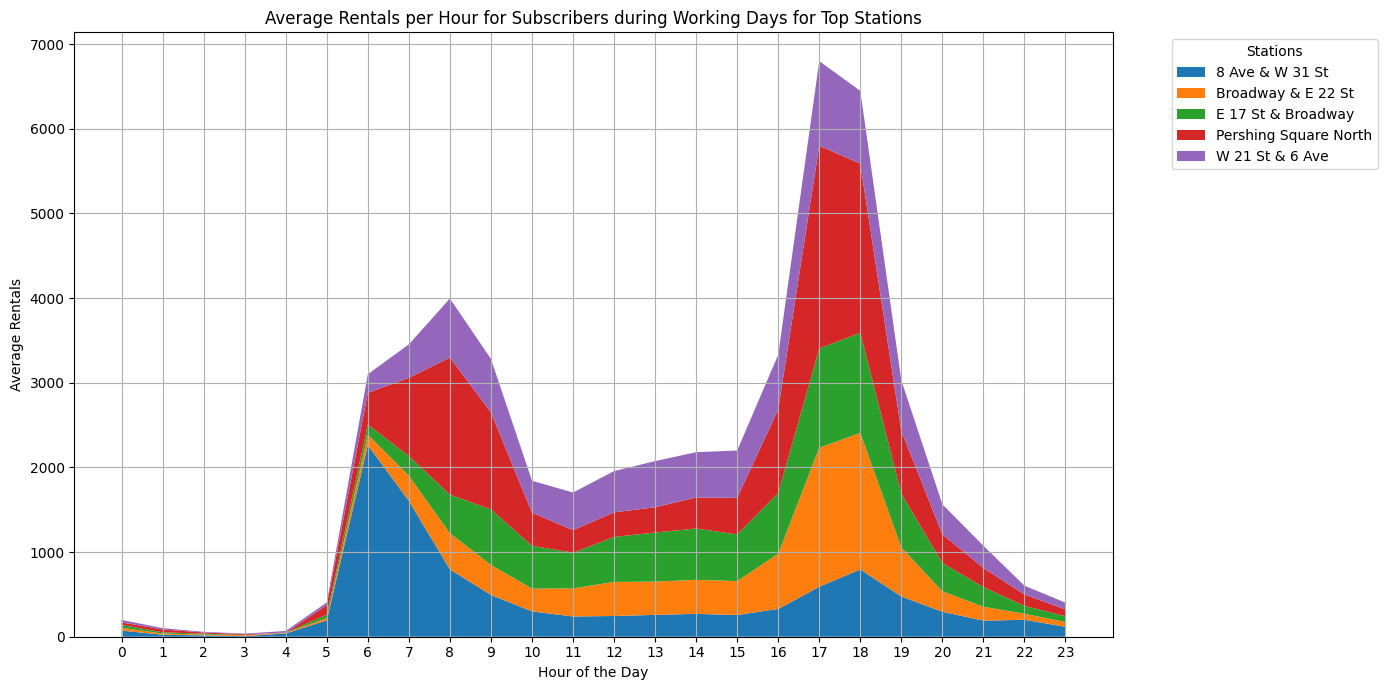

In [14]:
plt.figure(figsize=(14, 7))

# Create a stacked line plot
plt.stackplot(rentals_per_hour_pivot.index, rentals_per_hour_pivot.T, labels=rentals_per_hour_pivot.columns)

# Set x-axis ticks, labels, and grid
plt.xticks(ticks=rentals_per_hour_pivot.index)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.title('Average Rentals per Hour for Subscribers during Working Days for Top Stations')

# Display legend and grid
plt.legend(title="Stations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()


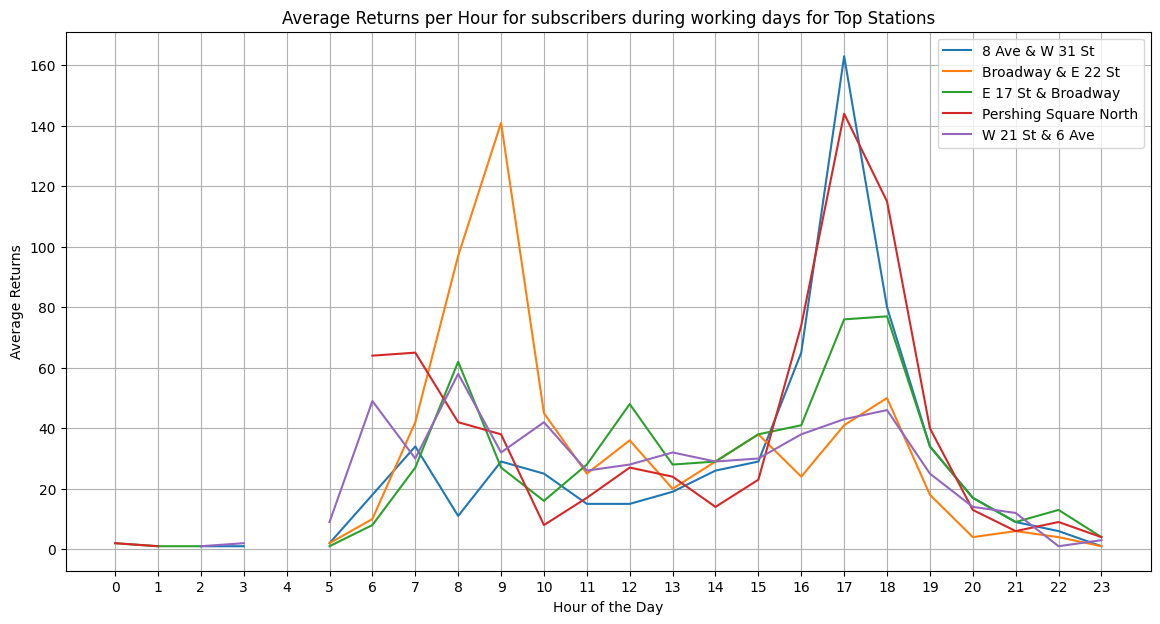

In [15]:
#plotting a graph to show the distribution of the hours for returns
plt.figure(figsize=(14, 7))
for station in rentals_per_hour_pivot.columns:
    plt.plot(returns_per_hour_pivot.index, returns_per_hour_pivot[station], label=station)

plt.xticks(ticks=returns_per_hour_pivot.index)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Returns')
plt.title('Average Returns per Hour for subscribers during working days for Top Stations')
plt.legend()
plt.grid(True)
plt.show()

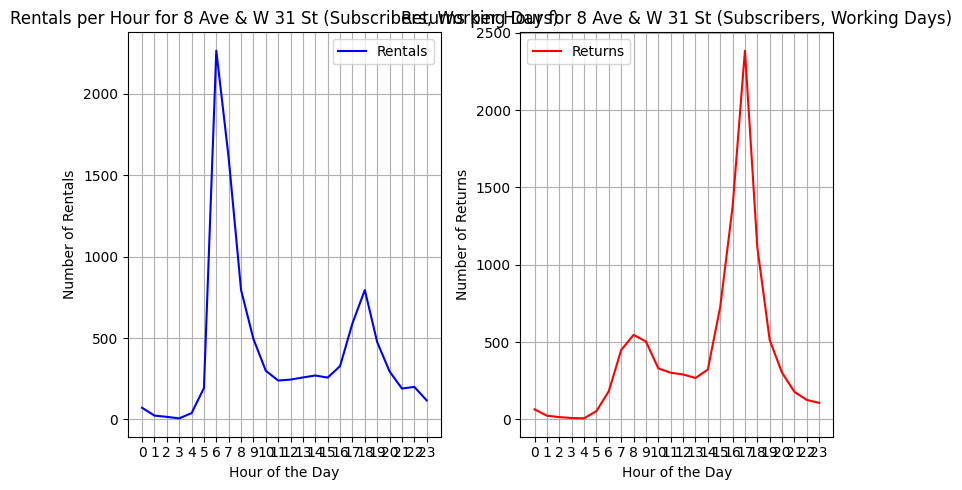

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert starttime and stoptime to datetime (if not already done)
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Extract hour and day of the week (0 = Monday, 6 = Sunday) from starttime and stoptime
df['start_hour'] = df['starttime'].dt.hour
df['stop_hour'] = df['stoptime'].dt.hour
df['start_day'] = df['starttime'].dt.weekday
df['stop_day'] = df['stoptime'].dt.weekday

# Define the station name
station_name = "8 Ave & W 31 St"  # Replace with the actual station name

# Filter for Subscribers, working days (0-4 for Monday to Friday), and the specific station
rentals = df[(df['usertype'] == 'Subscriber') & 
             (df['start_day'] <= 4) & 
             (df['start station name'] == station_name)]

returns = df[(df['usertype'] == 'Subscriber') & 
             (df['stop_day'] <= 4) & 
             (df['end station name'] == station_name)]

# Group by hour to count rentals and returns
rentals_per_hour = rentals.groupby('start_hour').size()
returns_per_hour = returns.groupby('stop_hour').size()

# Create separate plots for rentals and returns
plt.figure(figsize=(8, 5))

# Plot rentals
plt.subplot(1, 2, 1)
plt.plot(rentals_per_hour.index, rentals_per_hour.values, color='b', label='Rentals')
plt.title(f"Rentals per Hour for {station_name} (Subscribers, Working Days)")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rentals")
plt.xticks(range(24))
plt.grid(True)
plt.legend()

# Plot returns
plt.subplot(1, 2, 2)
plt.plot(returns_per_hour.index, returns_per_hour.values, color='r', label='Returns')
plt.title(f"Returns per Hour for {station_name} (Subscribers, Working Days)")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Returns")
plt.xticks(range(24))
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


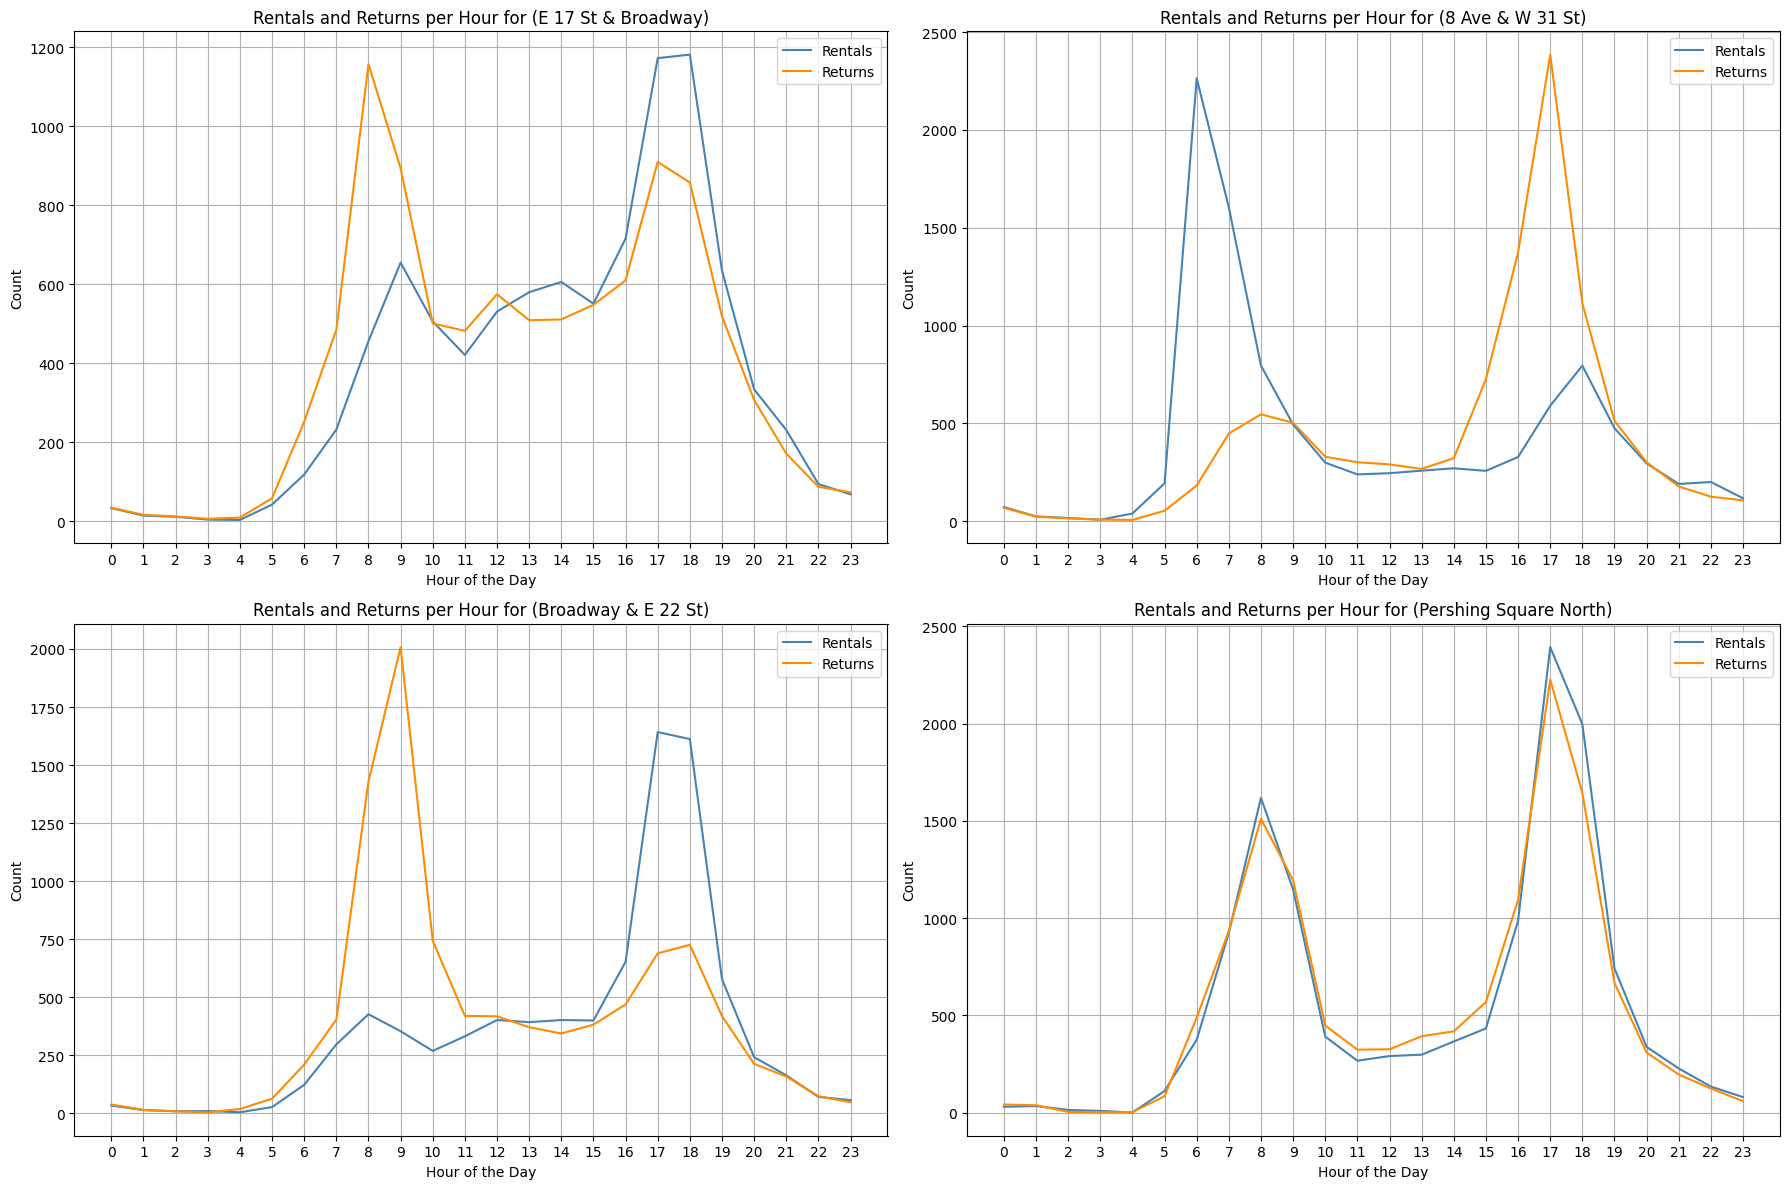

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Reset all rcParams to default
mpl.rcdefaults()

# Convert starttime and stoptime to datetime (if not already done)
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Extract hour and day of the week (0 = Monday, 6 = Sunday) from starttime and stoptime
df['start_hour'] = df['starttime'].dt.hour
df['stop_hour'] = df['stoptime'].dt.hour
df['start_day'] = df['starttime'].dt.weekday
df['stop_day'] = df['stoptime'].dt.weekday

# Define usertype and working days
usertype_filter = 'Subscriber'
working_days = df['start_day'] <= 4

# Filter data for subscribers and working days
filtered_df = df[(df['usertype'] == usertype_filter) & working_days]

# Get the top 4 stations based on rentals and returns
top_stations_rentals = filtered_df['start station name'].value_counts().head(3).index
top_stations_returns = filtered_df['end station name'].value_counts().head(3).index

# Combine top stations for both rentals and returns and limit to 4
top_stations = list(set(top_stations_rentals) | set(top_stations_returns))
# top_stations = top_stations[2]  # Keep only the top 4 stations

# Create a figure with subplots for each of the top stations
plt.figure(figsize=(18, 12))

# Loop through each top station and plot
for i, station in enumerate(top_stations):
    plt.subplot(2, 2, i + 1)
    
    # Filter for rentals and returns for the current station
    rentals = filtered_df[(df['start station name'] == station)]
    returns = filtered_df[(df['end station name'] == station)]
    
    # Group by hour to count rentals and returns
    rentals_per_hour = rentals.groupby('start_hour').size()
    returns_per_hour = returns.groupby('stop_hour').size()
    
    # Plot rentals
    plt.plot(rentals_per_hour.index, rentals_per_hour.values,color='steelblue', label='Rentals')
    
    # Plot returns
    plt.plot(returns_per_hour.index, returns_per_hour.values,color='darkorange', label='Returns')
    
    plt.title(f"Rentals and Returns per Hour for ({station})")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Count")
    plt.xticks(range(24))
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


### **- Conclusion of the investigation:**

- From the graphs, we can conclude that stations that are highly used in the morning as start stations and also used highly in the evening as return stations are probably resident areas as employees leave them in the morning and return to them in the evening.

- While stations that are highly used in the morning as a return stations and also highly used in the evening as start stations may be concluded to be workplaces.

### ***Q2:*** Investigate the average speed of the bike trips and analyze how it differs over time and between user types.

In [8]:
df['distance_km'] = df.apply(
    lambda row: haversine_distance(row['start station longitude'], row['start station latitude'], 
                                    row['end station longitude'], row['end station latitude']),axis=1)

df['speed_km_hr'] = (df["distance_km"]/(df['tripduration']/3600))

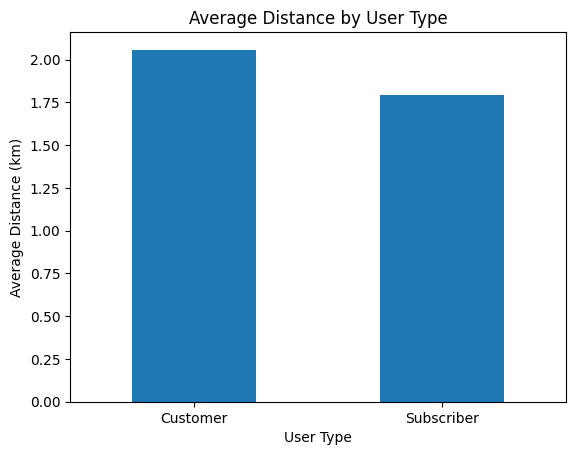

In [13]:
user_type_distance = df.groupby('usertype')['distance_km'].mean()
user_type_distance.plot(kind='bar')
plt.xlabel('User Type')
plt.xticks(rotation=0)
plt.ylabel('Average Distance (km)')
plt.title('Average Distance by User Type')
plt.show()

In [14]:
# preparing week days and hour grouped data

df['hour'] = df['starttime'].dt.hour
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 
df['day_of_week'] = df['starttime'].dt.day_name()
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True) # ordering by week day 

hourly_speed = df.groupby('hour')['speed_km_hr'].mean()
daily_speed = df.groupby('day_of_week')['speed_km_hr'].mean()
user_type_speed = df.groupby('usertype')['speed_km_hr'].mean()

In [32]:
# preparing week days and hour Subscriber data
df_Subscriber = df[df['usertype']=="Subscriber"]
df_Subscriber['hour'] = df_Subscriber['starttime'].dt.hour
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 
df_Subscriber['day_of_week'] = df_Subscriber['starttime'].dt.day_name()
df_Subscriber['day_of_week'] = pd.Categorical(df_Subscriber['day_of_week'], categories=day_order, ordered=True) # ordering by week day 

hourly_speed_Subscriber = df_Subscriber.groupby('hour')['speed_km_hr'].mean()
daily_speed_Subscriber = df_Subscriber.groupby('day_of_week')['speed_km_hr'].mean()

C:\Users\Youssef amr\AppData\Local\Temp\ipykernel_22476\3591597650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Subscriber['hour'] = df_Subscriber['starttime'].dt.hour
C:\Users\Youssef amr\AppData\Local\Temp\ipykernel_22476\3591597650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Subscriber['day_of_week'] = df_Subscriber['starttime'].dt.day_name()
C:\Users\Youssef amr\AppData\Local\Temp\ipykernel_22476\3591597650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [38]:
# preparing week days and hour Customer data

# df_Customer = df[df['usertype']=="Customer"]
df_customers['hour'] = df_customers['starttime'].dt.hour
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 
df_customers['day_of_week'] = df_customers['starttime'].dt.day_name()
df_customers['day_of_week'] = pd.Categorical(df_customers['day_of_week'], categories=day_order, ordered=True) # ordering by week day 

hourly_speed_Customer = df_customers.groupby('hour')['speed_km_hr'].mean()
daily_speed_Customer = df_customers.groupby('day_of_week')['speed_km_hr'].mean()

C:\Users\Youssef amr\AppData\Local\Temp\ipykernel_22476\1803254248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['hour'] = df_customers['starttime'].dt.hour
C:\Users\Youssef amr\AppData\Local\Temp\ipykernel_22476\1803254248.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['day_of_week'] = df_customers['starttime'].dt.day_name()
C:\Users\Youssef amr\AppData\Local\Temp\ipykernel_22476\1803254248.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

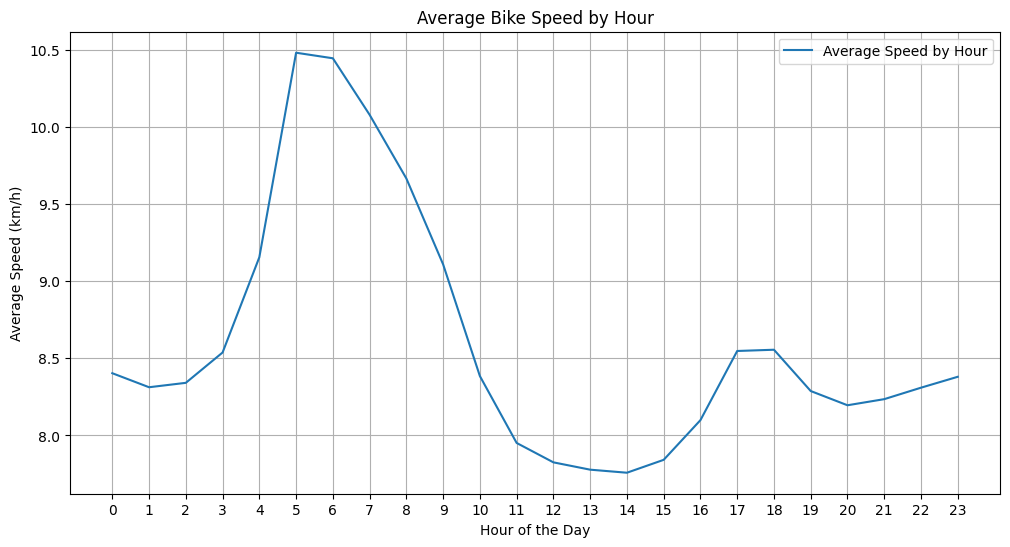

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_speed.index, hourly_speed.values, label='Average Speed by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed (km/h)')
plt.title('Average Bike Speed by Hour')
plt.xticks(range(24), range(24))
plt.legend()
plt.grid()
plt.show()

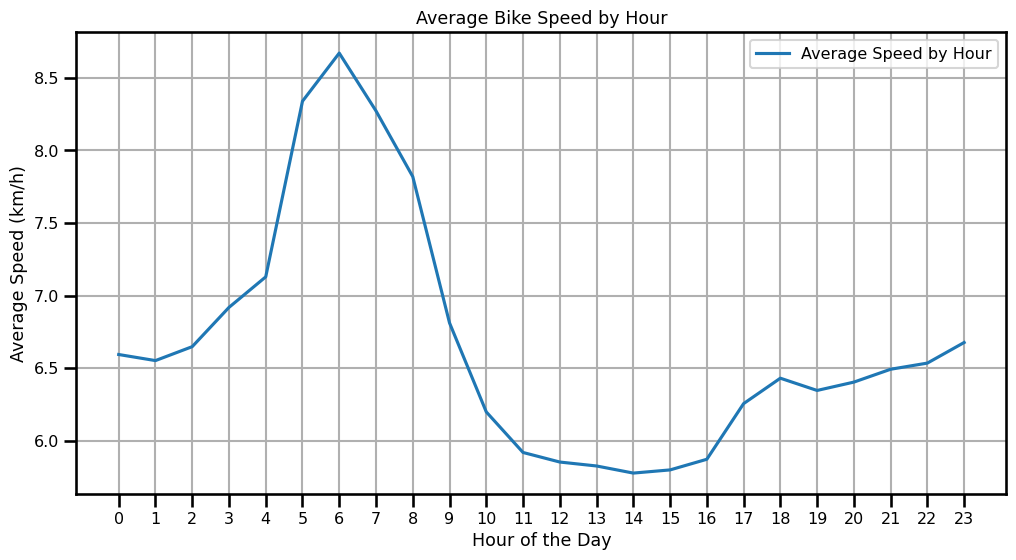

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_speed_Customer.index, hourly_speed_Customer.values, label='Average Speed by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed (km/h)')
plt.title('Average Bike Speed by Hour')
plt.xticks(range(24), range(24))
plt.legend()
plt.grid()
plt.show()

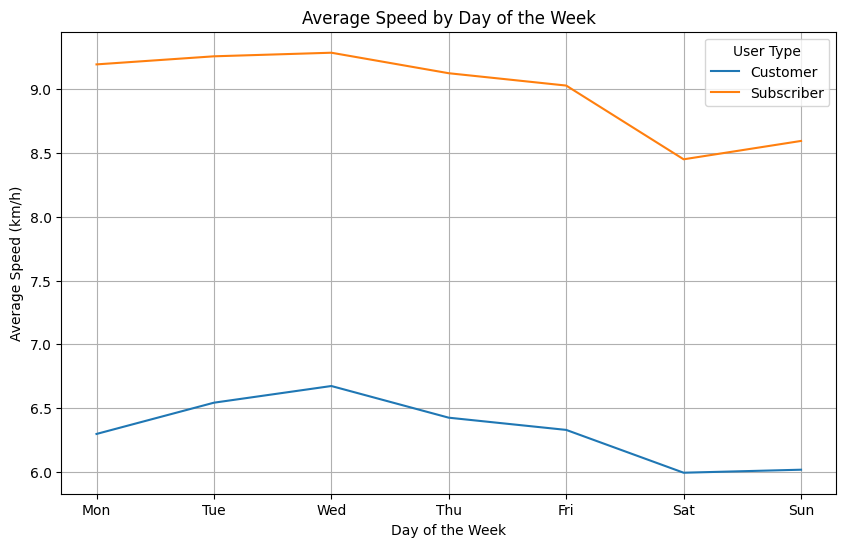

In [18]:
# Group by day of week and user type
avg_speed_by_day = df.groupby(['day_of_week', 'usertype'])['speed_km_hr'].mean().unstack()

# Plot average speed by day of the week
avg_speed_by_day.plot(kind='line', figsize=(10,6))

plt.title('Average Speed by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Speed (km/h)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.legend(title='User Type')
plt.show()

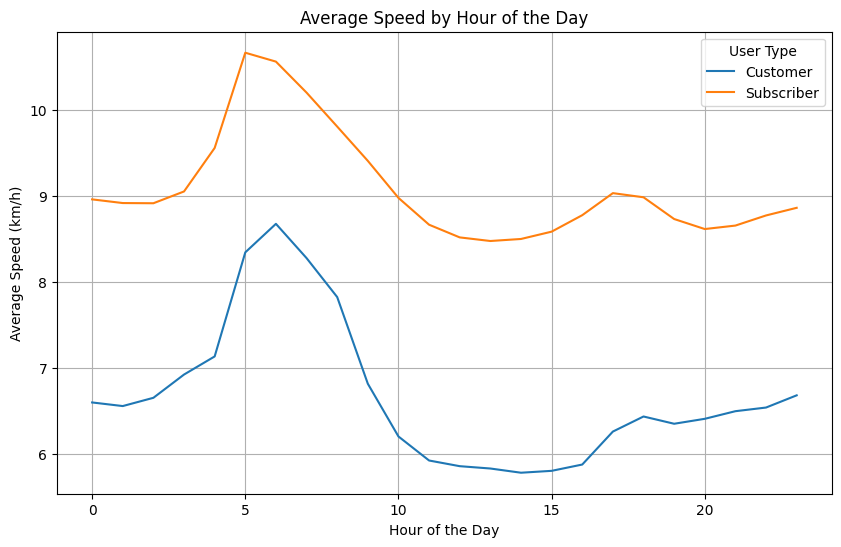

In [19]:
avg_speed_by_hour = df.groupby(['hour', 'usertype'])['speed_km_hr'].mean().unstack()

# Plot average speed by hour for both user types
avg_speed_by_hour.plot(kind='line', figsize=(10,6))

plt.title('Average Speed by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed (km/h)')
plt.grid(True)
plt.legend(title='User Type')
plt.show()


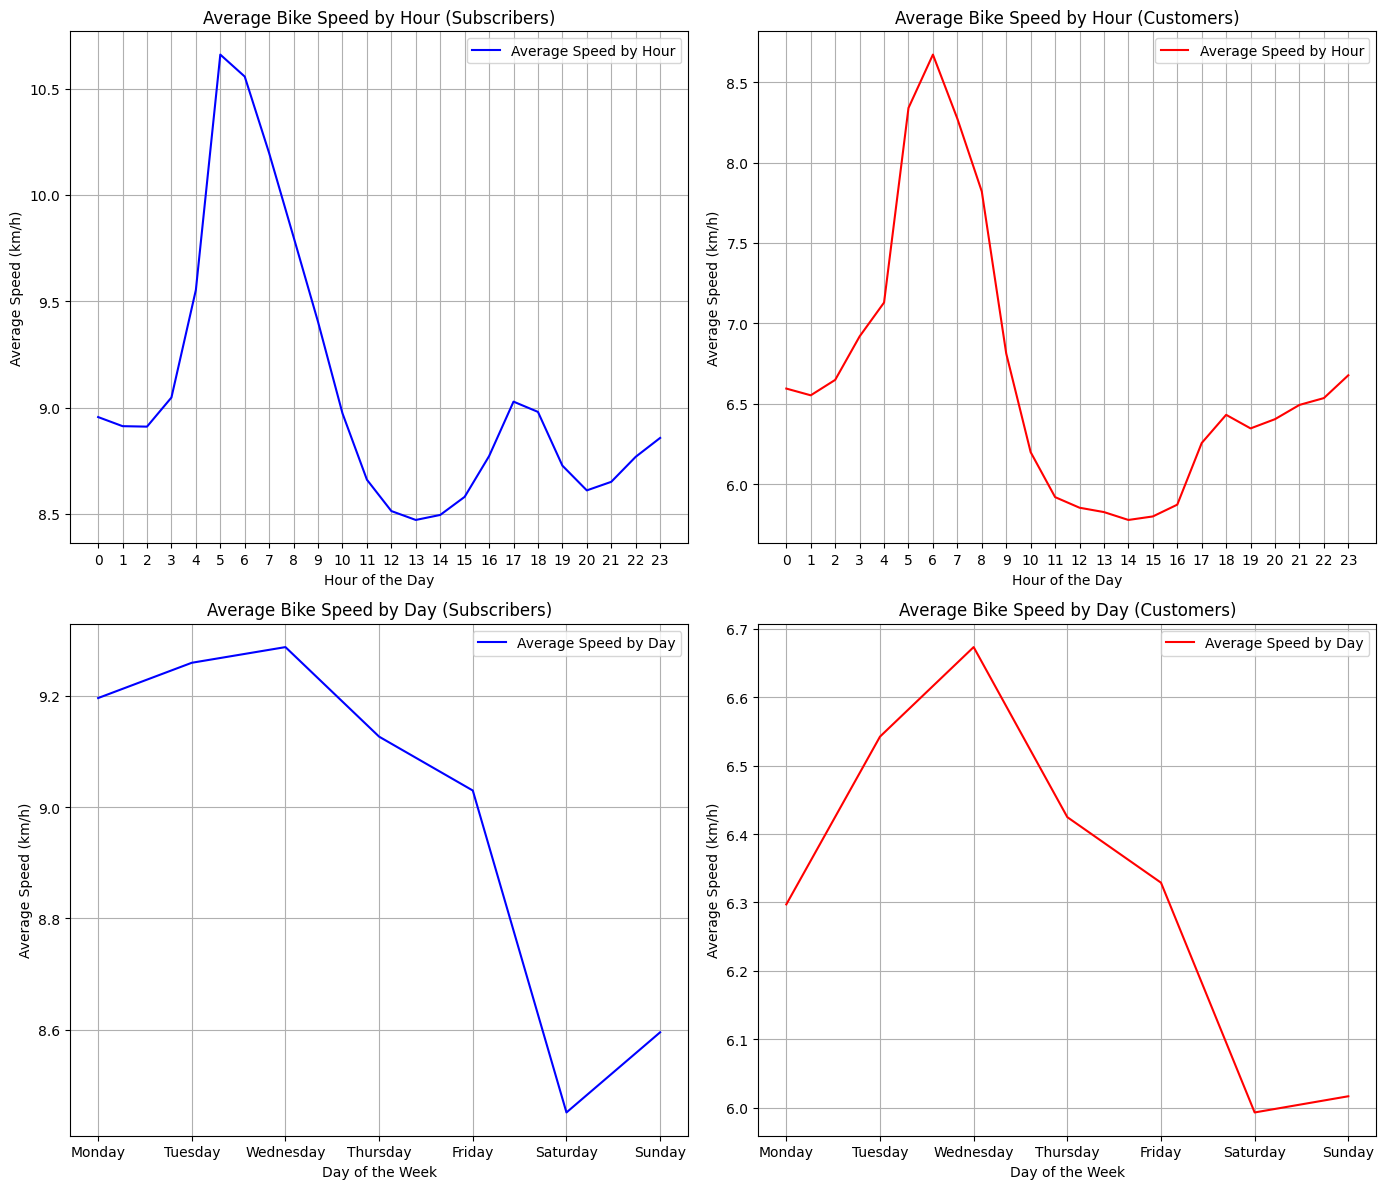

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert starttime to datetime if not already done
df['starttime'] = pd.to_datetime(df['starttime'])

# Extract hour and day of the week from starttime
df['hour'] = df['starttime'].dt.hour
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = df['starttime'].dt.day_name()
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True) # Ordering by week day

# Separate data by usertype
subscribers_df = df[df['usertype'] == 'Subscriber']
customers_df = df[df['usertype'] == 'Customer']

# Calculate average speed by hour for each user type
hourly_speed_subscribers = subscribers_df.groupby('hour')['speed_km_hr'].mean()
hourly_speed_customers = customers_df.groupby('hour')['speed_km_hr'].mean()

# Calculate average speed by day of the week for each user type
daily_speed_subscribers = subscribers_df.groupby('day_of_week')['speed_km_hr'].mean()
daily_speed_customers = customers_df.groupby('day_of_week')['speed_km_hr'].mean()

# Plot average speed by hour for Subscribers and Customers
plt.figure(figsize=(14, 12))

# Plot for Subscribers
plt.subplot(2, 2, 1)
plt.plot(hourly_speed_subscribers.index, hourly_speed_subscribers.values, label='Average Speed by Hour', color='b')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed (km/h)')
plt.title('Average Bike Speed by Hour (Subscribers)')
plt.xticks(range(24), range(24))
plt.grid()
plt.legend()

# Plot for Customers
plt.subplot(2, 2, 2)
plt.plot(hourly_speed_customers.index, hourly_speed_customers.values, label='Average Speed by Hour', color='r')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed (km/h)')
plt.title('Average Bike Speed by Hour (Customers)')
plt.xticks(range(24), range(24))
plt.grid()
plt.legend()

# Plot average speed by day of the week for Subscribers
plt.subplot(2, 2, 3)
plt.plot(daily_speed_subscribers.index, daily_speed_subscribers.values, label='Average Speed by Day', color='b')
plt.xlabel('Day of the Week')
plt.ylabel('Average Speed (km/h)')
plt.title('Average Bike Speed by Day (Subscribers)')
plt.grid()
plt.legend()

# Plot average speed by day of the week for Customers
plt.subplot(2, 2, 4)
plt.plot(daily_speed_customers.index, daily_speed_customers.values, label='Average Speed by Day', color='r')
plt.xlabel('Day of the Week')
plt.ylabel('Average Speed (km/h)')
plt.title('Average Bike Speed by Day (Customers)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


- **Observation:**
The peak of the average speed is at the morning between 4AM and 7AM which is may be as a results of people going to work in a rush, in the midday speed is the lowest this may be because people taking breaks or doing activities don't involve biking, in the late afternoon there is an increase in the average speed which may be related to people going back from work.

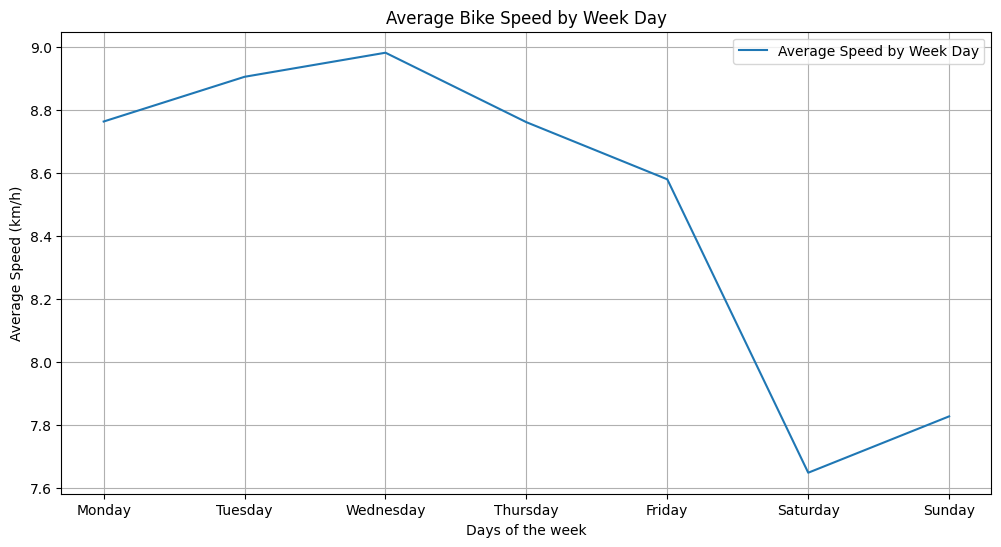

In [331]:
plt.figure(figsize=(12, 6))
plt.plot(daily_speed.index, daily_speed.values, label='Average Speed by Week Day')
plt.xlabel('Days of the week')
plt.ylabel('Average Speed (km/h)')
plt.title('Average Bike Speed by Week Day')
plt.grid()
plt.legend()
plt.show()

- **Observation:**
The top speed is at Wednesday which is the in the middle of weekdays. also, the speed is at it's lowest in weekends (Sunday and Saturday)

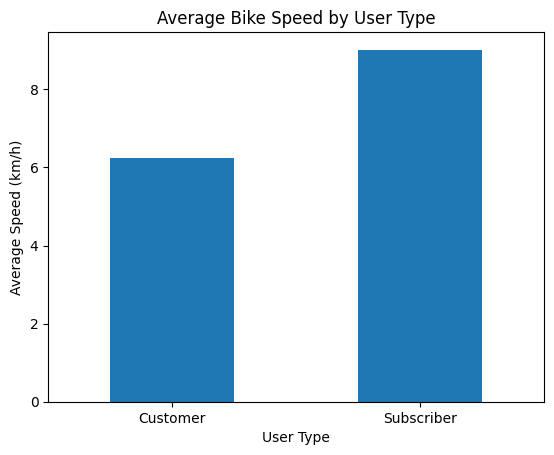

In [257]:
user_type_speed.plot(kind='bar')
plt.xlabel('User Type')
plt.xticks(rotation=0)
plt.ylabel('Average Speed (km/h)')
plt.title('Average Bike Speed by User Type')
plt.show()

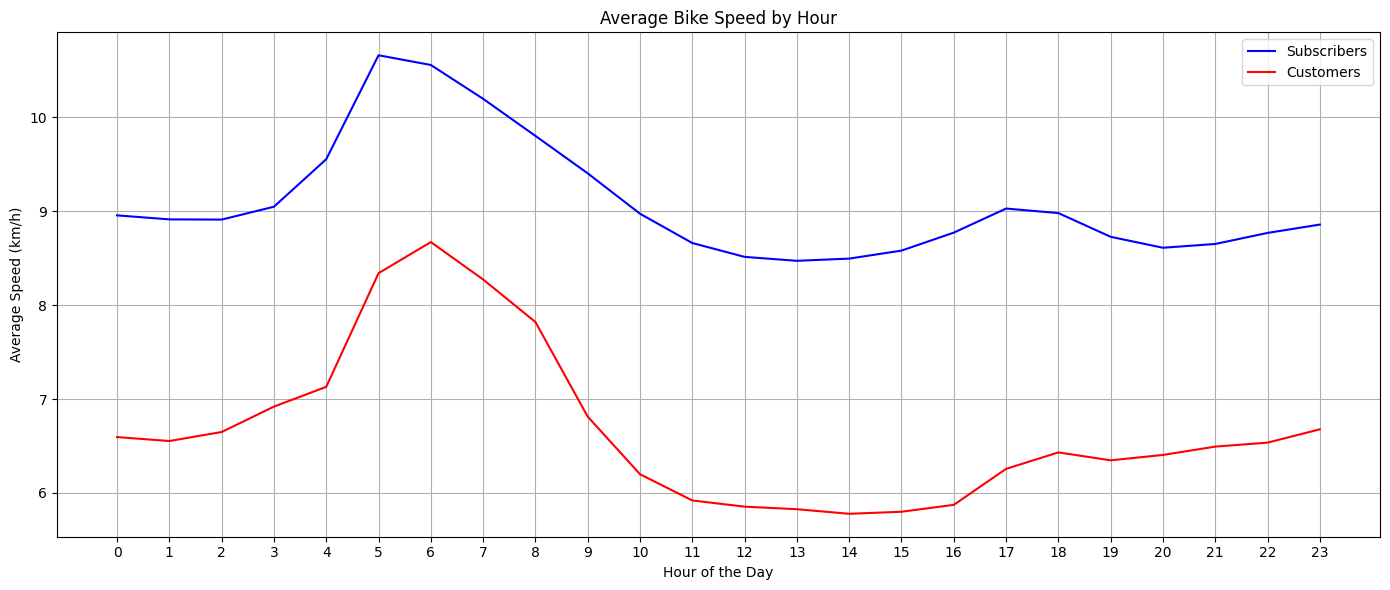

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert starttime to datetime if not already done
df['starttime'] = pd.to_datetime(df['starttime'])

# Extract hour and day of the week from starttime
df['hour'] = df['starttime'].dt.hour
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = df['starttime'].dt.day_name()
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)  # Ordering by week day

# Separate data by usertype
subscribers_df = df[df['usertype'] == 'Subscriber']
customers_df = df[df['usertype'] == 'Customer']

# Calculate average speed by hour for each user type
hourly_speed_subscribers = subscribers_df.groupby('hour')['speed_km_hr'].mean()
hourly_speed_customers = customers_df.groupby('hour')['speed_km_hr'].mean()

# Plot average speed by hour for Subscribers and Customers
plt.figure(figsize=(14, 6))

plt.plot(hourly_speed_subscribers.index, hourly_speed_subscribers.values, label='Subscribers', color='b')
plt.plot(hourly_speed_customers.index, hourly_speed_customers.values, label='Customers', color='r')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed (km/h)')
plt.title('Average Bike Speed by Hour')
plt.xticks(range(24), range(24))
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


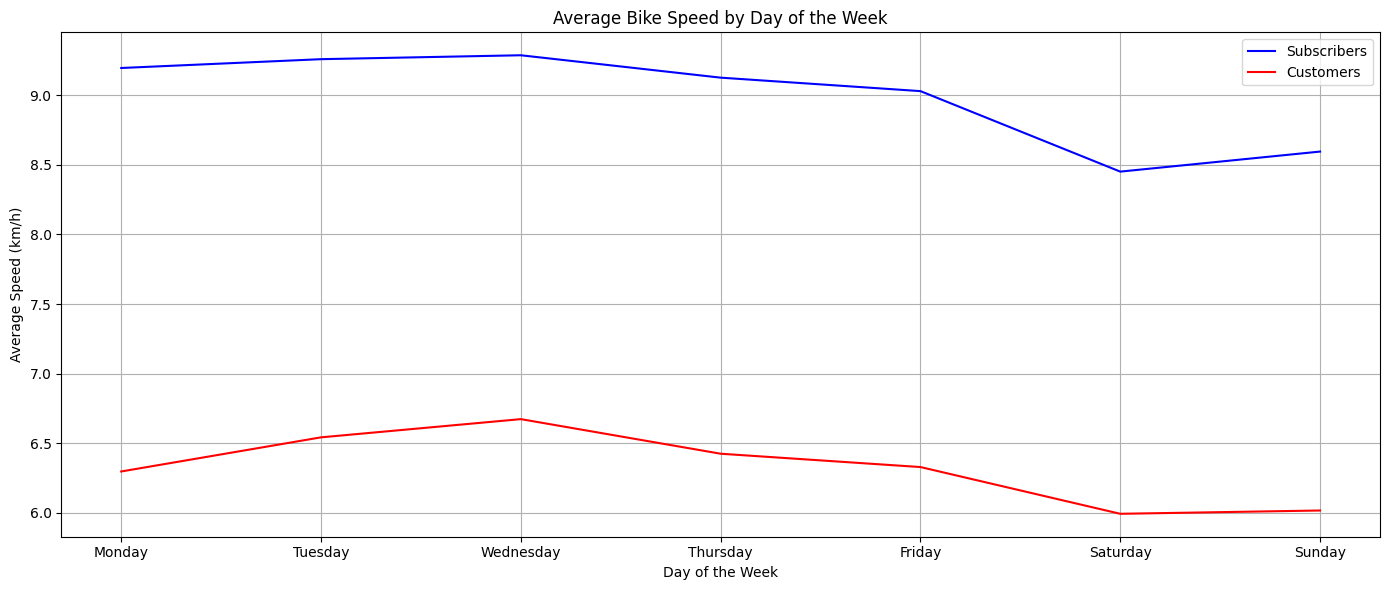

In [150]:
# Calculate average speed by day of the week for each user type
daily_speed_subscribers = subscribers_df.groupby('day_of_week')['speed_km_hr'].mean()
daily_speed_customers = customers_df.groupby('day_of_week')['speed_km_hr'].mean()

# Plot average speed by day of the week for Subscribers and Customers
plt.figure(figsize=(14, 6))

plt.plot(daily_speed_subscribers.index, daily_speed_subscribers.values, label='Subscribers', color='b')
plt.plot(daily_speed_customers.index, daily_speed_customers.values, label='Customers', color='r')
plt.xlabel('Day of the Week')
plt.ylabel('Average Speed (km/h)')
plt.title('Average Bike Speed by Day of the Week')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


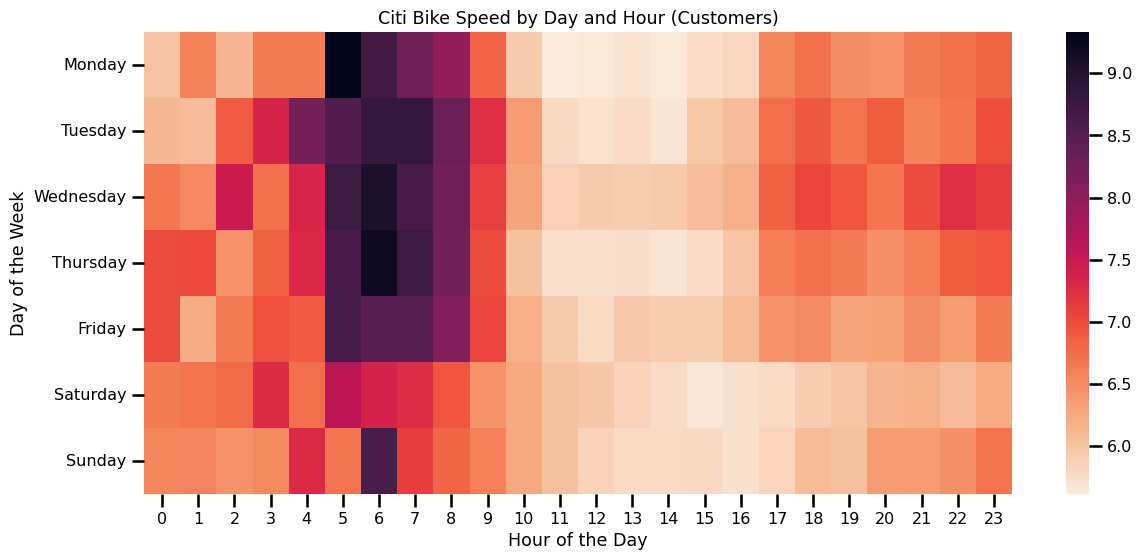

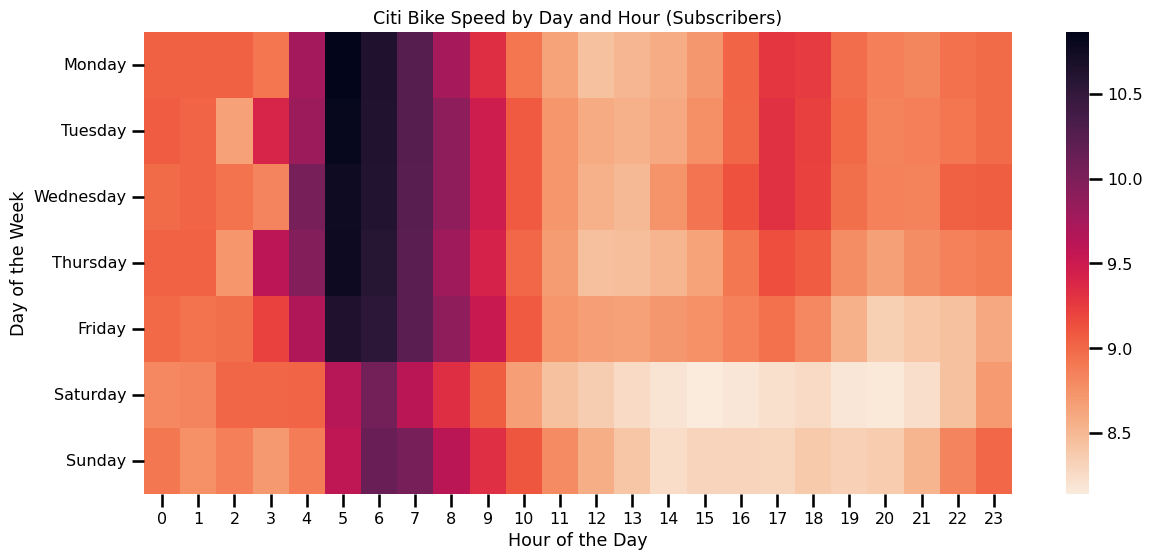

In [27]:
# Convert starttime to datetime if not already done
df['starttime'] = pd.to_datetime(df['starttime'])

# Extract hour and day of the week from starttime
df['hour'] = df['starttime'].dt.hour
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = df['starttime'].dt.day_name()
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)  # Ordering by week day

sns.set_context("talk", font_scale=0.7)
# visualizing the same figure but separated for customers and subscribers
df_customers = df[df['usertype'] == 'Customer']
df_subscribers = df[df['usertype'] == 'Subscriber']

# grouping data by week days and hour for customers and subscribers
day_night_usage_customers = df_customers.groupby(['day_of_week', 'hour'])['speed_km_hr'].mean().unstack().fillna(0)
day_night_usage_subscribers = df_subscribers.groupby(['day_of_week', 'hour'])['speed_km_hr'].mean().unstack().fillna(0)

#ploting heatmap for Customers
plt.figure(figsize=(14, 6))
sns.heatmap(day_night_usage_customers, cmap="rocket_r", cbar=True)
plt.title('Citi Bike Speed by Day and Hour (Customers)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

#plot heatmap for Subscribers
plt.figure(figsize=(14, 6))
sns.heatmap(day_night_usage_subscribers, cmap="rocket_r", cbar=True)
plt.title('Citi Bike Speed by Day and Hour (Subscribers)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

### **Observation:**
The speed behavior is similar across time but with different densities, the speed is high in the early morning between 5 and 7, then it gets down in the middle of the day and then it increases again at the evening. This might be due to:
- **Traffic Conditions:** The variation in speeds throughout the day might be influenced by traffic congestion, as heavier traffic can lead to slower bike speeds.
- **Weather:** Weather conditions can also impact Citi Bike usage and speed. For example, inclement weather might discourage riders, leading to lower overall speeds.


## Conclusions:

- The data is not equally reliable for both types. Subscribers' data appears more reliable overall, especially when it comes to gender data and the distribution of age groups.
- The Subscribers are mostly using the service for work transportations. while customers tend to use it more for fun activities.
- Customers and Subscribers trips are different which may indicate that they are concentrated in different regions in NYC city. 
- Most Subscribers take short, fast trips lasting between 5-10 minutes, which supports the idea that they primarily use the service for work transportation. On the other hand, Customers tend to take longer trips, covering greater distances at slower speeds.
- Subscribers and Customers are two different user profiles with different usage behavior for the service